# TASK - 3.2D : Machine Learning Algorithms: Mayo Clinic study on primary biliary cirrhosis (PBC)

* Task 3.2D: Modelling :Machine Learning Algorithms: Mayo Clinic study on primary biliary cirrhosis (PBC)
* Author: Amayika
* Student Number: 224207774
* Email Address: Kashyap.amayika009@gmail.com

# Introduction :

**This project focuses on analyzing the "Cirrhosis" results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption.**

This project **focuses on developing and evaluating machine learning models to predict the survival status of patients with liver cirrhosis.** The dataset, sourced from a Mayo Clinic study on primary biliary cirrhosis (PBC) conducted between 1974 and 1984, contains clinical information on 418 patients, each described by 17 features. **The goal is to use these clinical features to predict the survival state of patients, categorized as death (D), censored (C), or censored due to liver transplantation (CL).**
Liver cirrhosis is a serious condition resulting from long-term liver damage, often caused by chronic conditions such as hepatitis or alcohol abuse. Accurate prediction of patient outcomes can be crucial for clinical decision-making, treatment planning, and resource allocation in healthcare settings.



### Importing Necessary Liabraries before we begin with the modelling 

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


# Section - 1. Load and explore the Dataset.

## Part 1.a - Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

**Data Preprocessing and Exploration**
- a. Load the dataset, understand the summary and handle missing values.
- b. Univariate and Bivariate analysis
- c. Split the data into training (80%) and test (20%) sets. Identify feature types (continuous vs. categorical)
- d. Perform necessary encoding for categorical features
- e. Analyze label distribution in the training set

In [76]:
ele_df = pd.read_csv("cirrhosis.csv")
ele_df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [77]:
ele_df.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


### Inference after reading the data set

1. The dataset contains various clinical features for patients with liver cirrhosis.
2. Features include demographic information (age, sex), clinical signs (ascites, hepatomegaly, spiders, edema), and laboratory results (bilirubin, cholesterol, albumin, etc.).
3. The target variable "Status" has three categories: D (death), C (censored), and CL (censored due to liver transplantation).
4. Some patients received **D-penicillamine treatment, while others received a placebo.**
5. The data includes both categorical (e.g., sex, drug) and continuous variables (e.g., age, bilirubin levels).
6. There are missing values in some fields, indicated by blank spaces.

## Exploratory Data Analysis

In [78]:
ele_df.shape

(418, 20)

In [79]:
print("no. of rows: ",ele_df.shape[0], "\n""no. of columns: ",ele_df.shape[1])

no. of rows:  418 
no. of columns:  20


### Data Dictionary

- ID: Unique identifier for each patient (numeric)
- N_Days: Number of days between registration and the earlier of death, transplantation, or study analysis time (numeric)
- Status: Outcome of the patient (categorical)
    - D: Death
    - C: Censored
    - CL: Censored due to liver transplantation
- Drug: Treatment received (categorical)
- Age: Age of the patient in years (numeric)
- Sex: Gender of the patient (categorical)
- Ascites: Presence of ascites (categorical)
- Hepatomegaly: Presence of hepatomegaly (categorical)
- Spiders: Presence of spiders (categorical)
- Edema: Presence of edema (categorical)
- S: Possibly indicates 'Some' or a middle category
- Bilirubin: Serum bilirubin level (numeric)
- Cholesterol: Serum cholesterol level (numeric)
- Albumin: Serum albumin level (numeric)
- Copper: Urine copper level (numeric)
- Alk_Phos: Alkaline phosphatase level (numeric)
- SGOT: Serum glutamic-oxaloacetic transaminase level (numeric)
- Triglycerides: Triglycerides level (numeric)
- Platelets: Platelet count (numeric)
- Prothrombin: Prothrombin time (numeric)
- Stage: Stage of the disease (numeric, possibly ordinal)

In [80]:
ele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [81]:
ele_df.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

### Inference:

Based on this information, we can infer that:

1. The dataset has 418 entries and 20 columns.
2. There are three types of data: int64 (3 columns), float64 (10 columns), and object (7 columns).
3. Several columns have missing values, notably:
    - Drug, Ascites, Hepatomegaly, Spiders: 312 non-null values
    - Cholesterol: 284 non-null values
    - Tryglicerides: 282 non-null values
    - Copper: 310 non-null values

4. The target variable 'Status' is complete (418 non-null values) and of object type, suggesting it's categorical.
5. Most clinical measurements are stored as float64 type.
6. Demographic information (Age, Sex) and the target variable (Status) are complete for all entries.

#### Dropping the column 'ID' from the data set as it has no contribution to make in the analysis and modelling part and then again checking the summary and description of the data set

In [82]:
ele_df.drop('ID', axis=1 , inplace = True)

#### Checking the shape of the dat set after dropping the column "Unnamed:0"

In [83]:
print("no. of rows: ",ele_df.shape[0], "\n""no. of columns: ",ele_df.shape[1])

no. of rows:  418 
no. of columns:  19


### Summary of Data set:

In [84]:
ele_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
N_Days,418.0,NaN,NaN,NaN,1917.782297,1104.672992,41.0,1092.75,1730.0,2613.5,4795.0
Status,418,3,C,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drug,312,2,D-penicillamine,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,418.0,NaN,NaN,NaN,18533.351675,3815.845055,9598.0,15644.5,18628.0,21272.5,28650.0
Sex,418,2,F,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ascites,312,2,N,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hepatomegaly,312,2,Y,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spiders,312,2,N,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edema,418,3,N,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilirubin,418.0,NaN,NaN,NaN,3.220813,4.407506,0.3,0.8,1.4,3.4,28.0


### Summary of Dataset:

1. Sample size: 418 patients
2. Target variable: Status (3 categories, most frequent: C with 232 occurrences)
3. Features: 19 (7 categorical, 12 numerical)
4. Missing data: Present in several variables, notably Drug, Ascites, Hepatomegaly, Spiders, Cholesterol, and Triglycerides
5. Demographics: Age range 21-78 years (mean ~51), predominantly female (374 out of 418)
6. Key clinical features:
    - Bilirubin: Mean ~3.22, highly skewed (max 28.0)
    - Albumin: Mean ~3.5, relatively normal distribution
    - Platelets: Mean ~257, wide range (62-721)

7. Disease progression: Stage ranges from 1 to 4, with a mean of 3
8. Treatment: Two groups - D-penicillamine (158) and likely a control group
9. Survival time (N_Days): Ranges from 41 to 4795 days, with a mean of ~1918 days
10. This dataset captures various clinical and demographic factors for predicting survival status in liver cirrhosis patients, with notable class imbalance and missing data challenges.

### Making different categorical and numerical columns from the given data set

In [85]:
ele_df_new = ele_df.copy()

In [86]:
cat=[]
num=[]
for i in ele_df_new.columns:
    if ele_df_new[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


### Description of numerical column and categorical columns individually

In [87]:
ele_df_new[num].describe().T

,count,mean,std,min,25%,50%,75%,max
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00
Platelets,407.0,257.024570,98.325585,62.00,188.5000,251.00,318.00,721.00


In [88]:
ele_df_new[cat].describe().T

,count,unique,top,freq
Status,418,3,C,232
Drug,312,2,D-penicillamine,158
Sex,418,2,F,374
Ascites,312,2,N,288
Hepatomegaly,312,2,Y,160
Spiders,312,2,N,222
Edema,418,3,N,354


### Summary of Description frequency wise:

- Wide variability in disease progression: N_Days ranges from 104 to 4795, indicating significant differences in patient follow-up or survival times.
- Predominantly middle-aged cohort: Average age is about 51 years, with most patients between 40-60 years old.
- Liver function abnormalities: Elevated and highly variable levels of bilirubin, alkaline phosphatase, and SGOT suggest diverse degrees of liver dysfunction across patients.
- Potential nutritional deficiencies: Low albumin levels in some patients may indicate poor nutritional status or liver synthetic function.
- Coagulation concerns: Prothrombin times show some elevation and variability, pointing to potential coagulation issues in this population.
- Advanced disease stages: Most patients are in later stages (3-4) of the disease, indicating a cohort with predominantly advanced liver cirrhosis.

1. Status: 3 categories, most common is C (232)
2. Drug: 2 types, D-penicillamine most frequent (158)
3. Sex: Predominantly female (374/418)
4. Ascites: Mostly absent (288/312)
5. Hepatomegaly: Present in majority (160/312)
6. Spiders: Mostly absent (222/312)
7. Edema: Largely absent (354/418)

**Key issues:**

- Class imbalance in Status
- 106 missing values in several variables
- Strong gender skew


### Checking missing values in the data set

In [89]:
ele_df.isnull().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

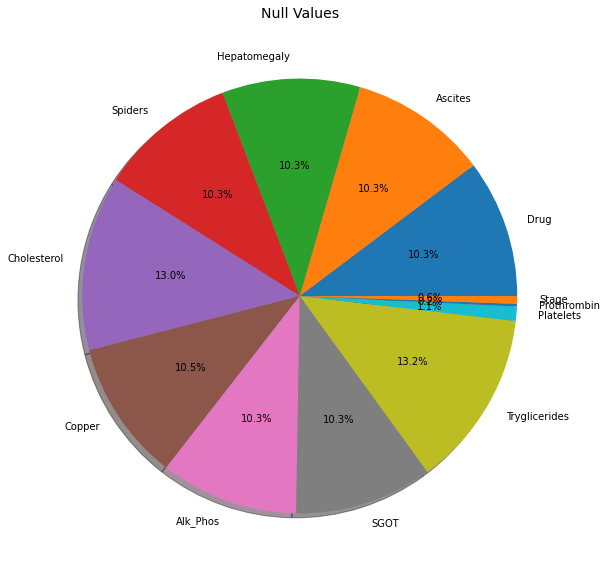

In [90]:
plt.figure(figsize=(10,10))
ele_df.isnull().sum()[ele_df.isnull().sum()>0].plot(kind='pie',autopct='%1.1f%%', shadow=True )
plt.title('Null Values' ,fontsize=14);

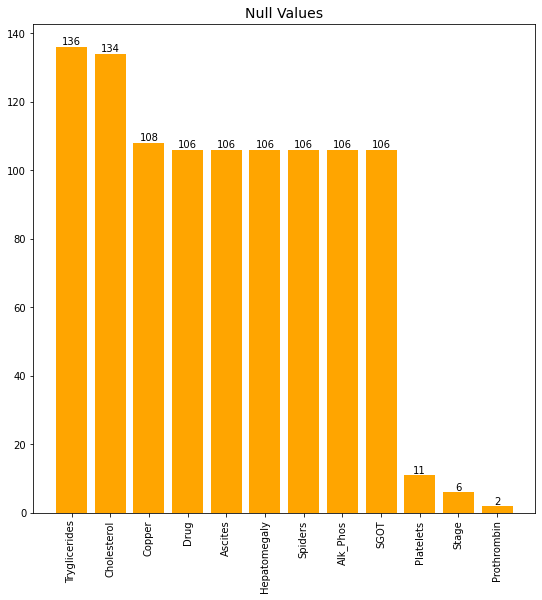

In [91]:
# Sort the columns by the number of missing values
missing_values = ele_df.isnull().sum()[ele_df.isnull().sum() > 0].sort_values(ascending=False)

plt.figure(figsize=(9, 9))
bars = plt.bar(missing_values.index, missing_values, color='orange')

# Add the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')

plt.title('Null Values', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


### Inference:
Uding these graphs we can see that how many data is missing in all the variables in both percentage as well as numbers. We will treat them according to the their data types as we move haed for modelling.

### Checking the number of duplicate rows in the data set

In [92]:
dups = ele_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(ele_df.shape)

Number of duplicate rows = 0
(418, 19)


### Dropping the duplicate rows

In [93]:
ele_df = ele_df.drop_duplicates()

In [94]:
dups = ele_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(ele_df.shape)

Number of duplicate rows = 0
(418, 19)


### Inference based on Null value Detection and Duplicate rows Detection:

- Several features have **106 missing values (Drug, Ascites, Hepatomegaly, Spiders, Alk_Phos, SGOT)**
- Cholesterol and Triglycerides have the most missing values (134 and 136)
- Some features (N_Days, Status, Age, Sex, Edema, Bilirubin, Albumin) have no missing values
- **There are no duplicate rows in the data set.**

**Approach which we can use:**

1. For features with 106 missing values, We can consider if they're related and investigate the cause.
2. We can use mean/median imputation for numerical features with few missing values
3. For categorical variables, we can impute with mode or create a "Missing" category
4. We can Consider advanced techniques like multiple imputation or KNN imputation for features with many missing values
5. Evaluate the impact of imputation on model performance

### Checking the skewness in the data set

In [95]:
skewness_ele= pd.DataFrame(ele_df.skew())
skewness_ele

,0
N_Days,0.472602
Age,0.086850
Bilirubin,2.717611
Cholesterol,3.408526
Albumin,-0.467527
Copper,2.303640
Alk_Phos,2.992834
SGOT,1.449197
Tryglicerides,2.523902
Platelets,0.627098


### Inference on the Skewness of the Data

1. Highly positively skewed (>1):

    - Bilirubin, Cholesterol, Copper, Alk_Phos, SGOT, Triglycerides, Prothrombin

2. Moderately positively skewed (0.5 to 1):
    - N_Days, Platelets

3. Approximately symmetric (-0.5 to 0.5):
    - Age, Albumin, Stage
4. No severely negatively skewed variables

**Most clinical measurements are right-skewed, indicating presence of outliers or extreme values. This suggests need for data transformation (e.g., log transformation) or robust modeling techniques to handle non-normal distributions in these features.**

## UNIVARIATE ANALYSIS

### Numerical feature levels frequencies

In [96]:
ele_df_num = ele_df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(ele_df_num.columns.values)
lstnumericcolumns

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [97]:
for cols in lstnumericcolumns:
    print(cols, ele_df[cols].nunique())
    print(ele_df[cols].value_counts().sort_values())
    print('=======================')
    print('')

N_Days 399
559     1
2400    1
51      1
3762    1
304     1
       ..
2504    2
1925    2
597     2
1170    2
1434    2
Name: N_Days, Length: 399, dtype: int64

Age 344
20510    1
24201    1
20284    1
19379    1
15526    1
        ..
22646    5
23376    5
18628    6
18993    6
19724    7
Name: Age, Length: 344, dtype: int64

Bilirubin 98
4.6      1
14.1     1
8.9      1
5.4      1
9.0      1
        ..
1.1     20
0.8     23
0.5     23
0.6     31
0.7     33
Name: Bilirubin, Length: 98, dtype: int64

Cholesterol 201
340.0    1
376.0    1
282.0    1
482.0    1
276.0    1
        ..
232.0    3
242.0    3
448.0    4
316.0    4
260.0    4
Name: Cholesterol, Length: 201, dtype: int64

Albumin 154
3.17     1
2.95     1
2.81     1
2.60     1
2.77     1
        ..
3.65     7
3.40     7
3.60     8
3.50     8
3.35    11
Name: Albumin, Length: 154, dtype: int64

Copper 158
15.0     1
308.0    1
71.0     1
78.0     1
100.0    1
        ..
20.0     5
75.0     6
58.0     6
67.0     7
52.0     8
Name

### Unique Values Analysis

In [98]:
unique_counts_ele = []
for col in ele_df.columns:
    unique_counts_ele.append((col, ele_df[col].nunique()))
unique_counts_ele = sorted(unique_counts_ele, key=lambda x: x[1],reverse = True)
print("No of unique values in each column are as follows:(In Descending order)\n")
for col,nunique in unique_counts_ele:
    print(f"{col}: {nunique}: {round(nunique/11217*100,2)}%")

No of unique values in each column are as follows:(In Descending order)

N_Days: 399: 3.56%
Age: 344: 3.07%
Alk_Phos: 295: 2.63%
Platelets: 243: 2.17%
Cholesterol: 201: 1.79%
SGOT: 179: 1.6%
Copper: 158: 1.41%
Albumin: 154: 1.37%
Tryglicerides: 146: 1.3%
Bilirubin: 98: 0.87%
Prothrombin: 48: 0.43%
Stage: 4: 0.04%
Status: 3: 0.03%
Edema: 3: 0.03%
Drug: 2: 0.02%
Sex: 2: 0.02%
Ascites: 2: 0.02%
Hepatomegaly: 2: 0.02%
Spiders: 2: 0.02%


### Inferences based on unique value analysis:
1. High Variability: N_Days, Age, Alk_Phos, Platelets: Wide ranges, useful for detailed analysis.
2. Moderate Variability: Cholesterol, SGOT, Copper, Albumin, Tryglicerides, Bilirubin, Prothrombin: Reflects different health conditions.
3. Low Variability: Stage, Status, Edema, Drug, Sex, Ascites, Hepatomegaly, Spiders: Limited unique values, useful for categorical analysis.
4. Overall, the dataset offers a good mix of continuous and categorical features for modeling.

### Checking the Unique values in each categorical columns which has different factors present in it:

We will now do the categorical analysis of all the categorical data types features so that we can see how they are behaving throughout the data set and also what can be their impact on the Target variable.

In [99]:
ele_cat = ele_df.select_dtypes(include = ['object'])
lstcatcolumns = list(ele_cat.columns.values)
lstcatcolumns

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [100]:
ele_cat_new = ele_df_new.select_dtypes(include = ['object'])
lstcatcolumns = list(ele_cat_new.columns.values)
lstcatcolumns

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [101]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(ele_cat_new[cat_column].value_counts())
    plt.figure()
    ele_cat_new[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

Details of Status
----------------------------------------------------------------
C     232
D     161
CL     25
Name: Status, dtype: int64


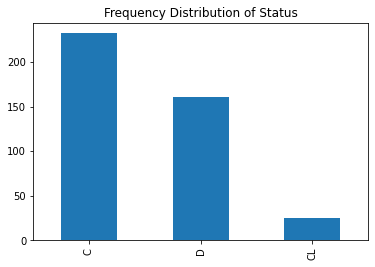

       
Details of Drug
----------------------------------------------------------------
D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64


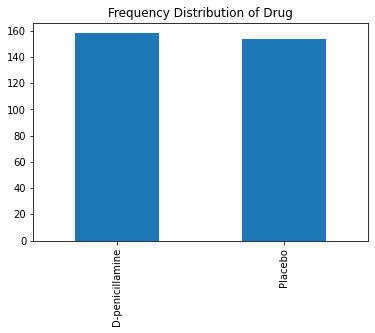

       
Details of Sex
----------------------------------------------------------------
F    374
M     44
Name: Sex, dtype: int64


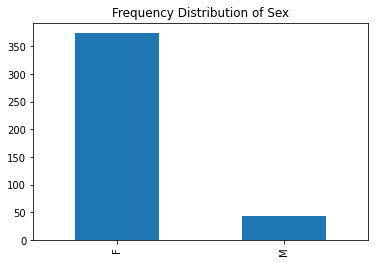

       
Details of Ascites
----------------------------------------------------------------
N    288
Y     24
Name: Ascites, dtype: int64


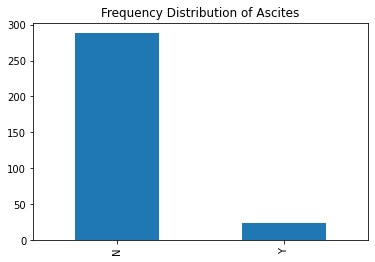

       
Details of Hepatomegaly
----------------------------------------------------------------
Y    160
N    152
Name: Hepatomegaly, dtype: int64


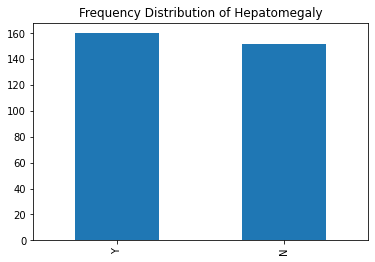

       
Details of Spiders
----------------------------------------------------------------
N    222
Y     90
Name: Spiders, dtype: int64


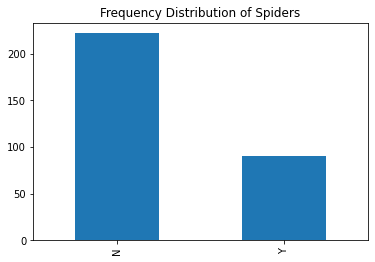

       
Details of Edema
----------------------------------------------------------------
N    354
S     44
Y     20
Name: Edema, dtype: int64


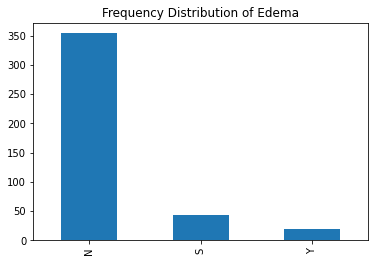

In [102]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

### Inference based on Univariate Analysis of categorical columns:

1. Edema: 
    - Majority of patients (354) have no edema (N)
    - Small number of patients have edema (44 with S, 28 with Y)
    - Highly imbalanced distribution

2. Hepatomegaly:
    - Almost evenly split between presence (160) and absence (152) of hepatomegaly
    - Balanced distribution

3. Spiders:
    - More patients without spiders (222) than with spiders (98)
    - Moderately imbalanced distribution

4. Sex:
    - Significantly more females (374) than males (44)
    - Highly imbalanced distribution

5. Ascites:
    - Majority of patients (288) do not have ascites
    - Small number (24) have ascites
    - Highly imbalanced distribution

6. Status:
    - Three categories: C (232), D (161), and CL (25)
    - C (possibly "censored") is the most common outcome
    - CL (possibly "censored due to liver transplantation") is the least common
    - Moderately imbalanced distribution

7. Drug:
    - Almost evenly split between D-penicillamine (158) and Placebo (154)
    - Balanced distribution

### Univariate analysis of Numerical columns:

In [103]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(ele_df_new[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(ele_df_new[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=ele_df_new[column])
    plt.show()

Description of N_Days
----------------------------------------------------------------------------
count     418.000000
mean     1917.782297
std      1104.672992
min        41.000000
25%      1092.750000
50%      1730.000000
75%      2613.500000
max      4795.000000
Name: N_Days, dtype: float64 Distribution of N_Days
----------------------------------------------------------------------------


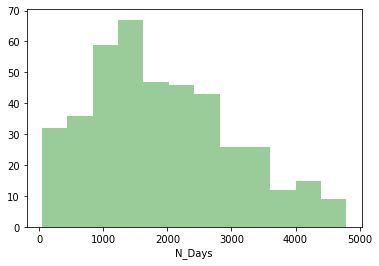

BoxPlot of N_Days
----------------------------------------------------------------------------


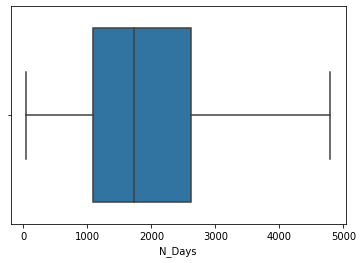

Description of Age
----------------------------------------------------------------------------
count      418.000000
mean     18533.351675
std       3815.845055
min       9598.000000
25%      15644.500000
50%      18628.000000
75%      21272.500000
max      28650.000000
Name: Age, dtype: float64 Distribution of Age
----------------------------------------------------------------------------


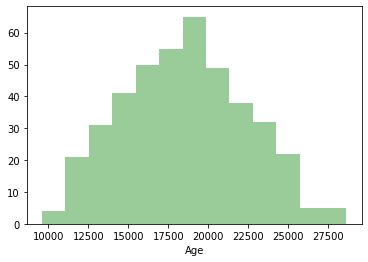

BoxPlot of Age
----------------------------------------------------------------------------


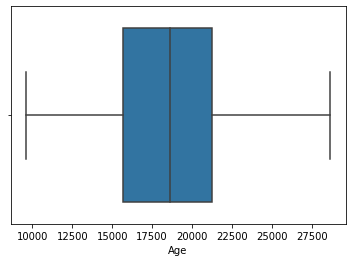

Description of Bilirubin
----------------------------------------------------------------------------
count    418.000000
mean       3.220813
std        4.407506
min        0.300000
25%        0.800000
50%        1.400000
75%        3.400000
max       28.000000
Name: Bilirubin, dtype: float64 Distribution of Bilirubin
----------------------------------------------------------------------------


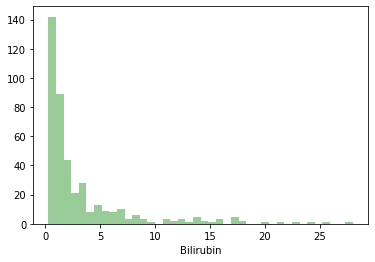

BoxPlot of Bilirubin
----------------------------------------------------------------------------


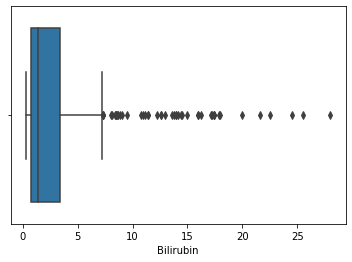

Description of Cholesterol
----------------------------------------------------------------------------
count     284.000000
mean      369.510563
std       231.944545
min       120.000000
25%       249.500000
50%       309.500000
75%       400.000000
max      1775.000000
Name: Cholesterol, dtype: float64 Distribution of Cholesterol
----------------------------------------------------------------------------


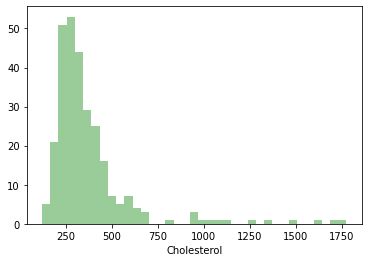

BoxPlot of Cholesterol
----------------------------------------------------------------------------


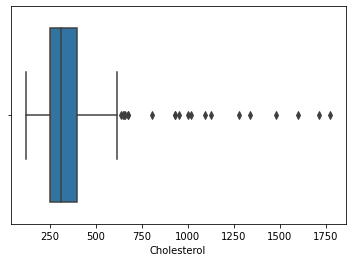

Description of Albumin
----------------------------------------------------------------------------
count    418.000000
mean       3.497440
std        0.424972
min        1.960000
25%        3.242500
50%        3.530000
75%        3.770000
max        4.640000
Name: Albumin, dtype: float64 Distribution of Albumin
----------------------------------------------------------------------------


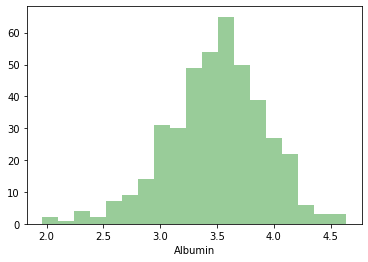

BoxPlot of Albumin
----------------------------------------------------------------------------


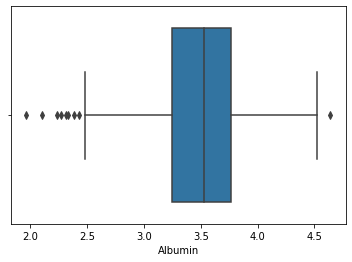

Description of Copper
----------------------------------------------------------------------------
count    310.000000
mean      97.648387
std       85.613920
min        4.000000
25%       41.250000
50%       73.000000
75%      123.000000
max      588.000000
Name: Copper, dtype: float64 Distribution of Copper
----------------------------------------------------------------------------


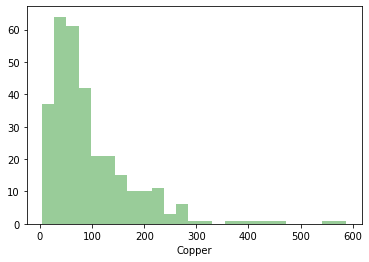

BoxPlot of Copper
----------------------------------------------------------------------------


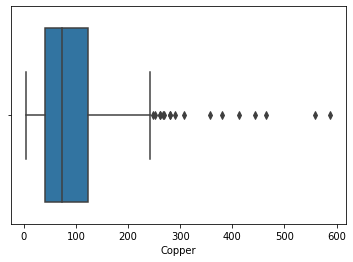

Description of Alk_Phos
----------------------------------------------------------------------------
count      312.000000
mean      1982.655769
std       2140.388824
min        289.000000
25%        871.500000
50%       1259.000000
75%       1980.000000
max      13862.400000
Name: Alk_Phos, dtype: float64 Distribution of Alk_Phos
----------------------------------------------------------------------------


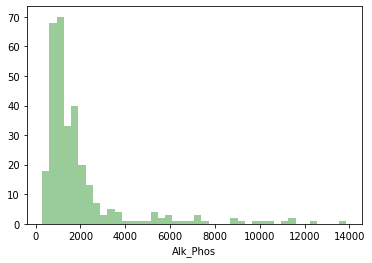

BoxPlot of Alk_Phos
----------------------------------------------------------------------------


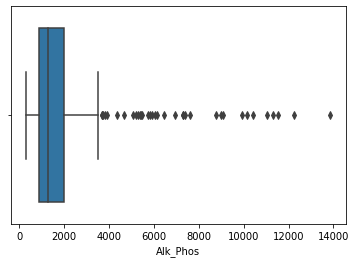

Description of SGOT
----------------------------------------------------------------------------
count    312.000000
mean     122.556346
std       56.699525
min       26.350000
25%       80.600000
50%      114.700000
75%      151.900000
max      457.250000
Name: SGOT, dtype: float64 Distribution of SGOT
----------------------------------------------------------------------------


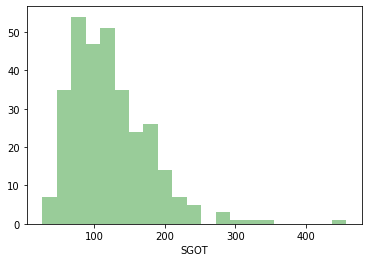

BoxPlot of SGOT
----------------------------------------------------------------------------


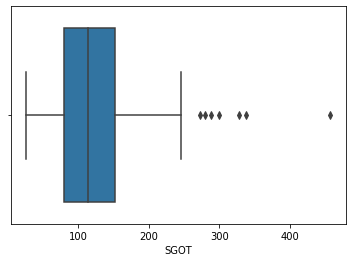

Description of Tryglicerides
----------------------------------------------------------------------------
count    282.000000
mean     124.702128
std       65.148639
min       33.000000
25%       84.250000
50%      108.000000
75%      151.000000
max      598.000000
Name: Tryglicerides, dtype: float64 Distribution of Tryglicerides
----------------------------------------------------------------------------


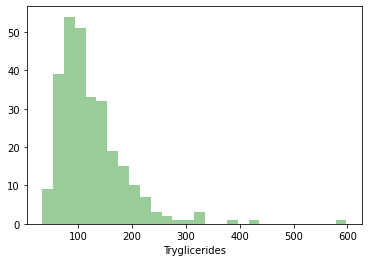

BoxPlot of Tryglicerides
----------------------------------------------------------------------------


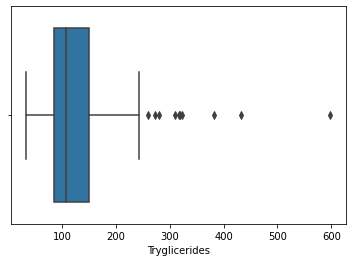

Description of Platelets
----------------------------------------------------------------------------
count    407.000000
mean     257.024570
std       98.325585
min       62.000000
25%      188.500000
50%      251.000000
75%      318.000000
max      721.000000
Name: Platelets, dtype: float64 Distribution of Platelets
----------------------------------------------------------------------------


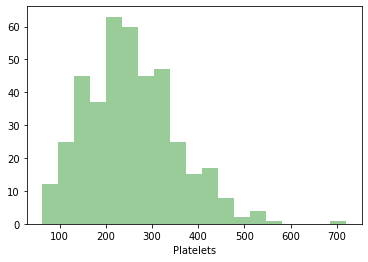

BoxPlot of Platelets
----------------------------------------------------------------------------


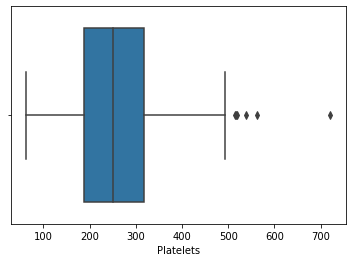

Description of Prothrombin
----------------------------------------------------------------------------
count    416.000000
mean      10.731731
std        1.022000
min        9.000000
25%       10.000000
50%       10.600000
75%       11.100000
max       18.000000
Name: Prothrombin, dtype: float64 Distribution of Prothrombin
----------------------------------------------------------------------------


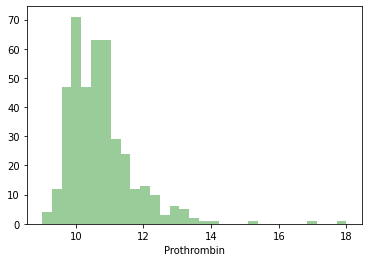

BoxPlot of Prothrombin
----------------------------------------------------------------------------


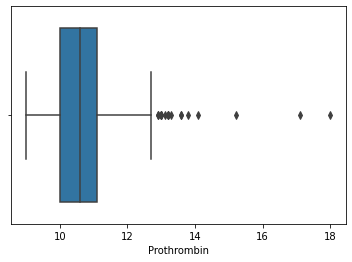

Description of Stage
----------------------------------------------------------------------------
count    412.000000
mean       3.024272
std        0.882042
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Stage, dtype: float64 Distribution of Stage
----------------------------------------------------------------------------


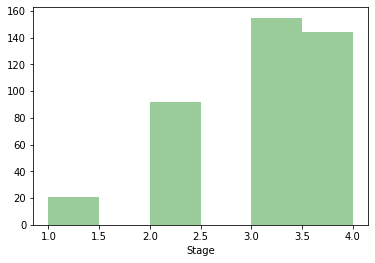

BoxPlot of Stage
----------------------------------------------------------------------------


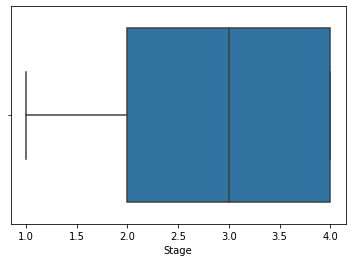

In [104]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

### Inference based on Univariate Analysis of various columns:

- Wide variability in disease progression: N_Days ranges from 104 to 4795, indicating significant differences in patient follow-up or survival times.
- Predominantly middle-aged cohort: Average age is about 51 years, with most patients between 40-60 years old.
- Liver function abnormalities: Elevated and highly variable levels of bilirubin, alkaline phosphatase, and SGOT suggest diverse degrees of liver dysfunction across patients.
- Potential nutritional deficiencies: Low albumin levels in some patients may indicate poor nutritional status or liver synthetic function.
- Coagulation concerns: Prothrombin times show some elevation and variability, pointing to potential coagulation issues in this population.
- Advanced disease stages: Most patients are in later stages (3-4) of the disease, indicating a cohort with predominantly advanced liver cirrhosis.

### Checking the presence of outliers

In [105]:
ele_df_num = ele_df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(ele_df_num.columns.values)
len(lstnumericcolumns)

12

### Check for presence of outliers in each feature and constructing box plot for variables

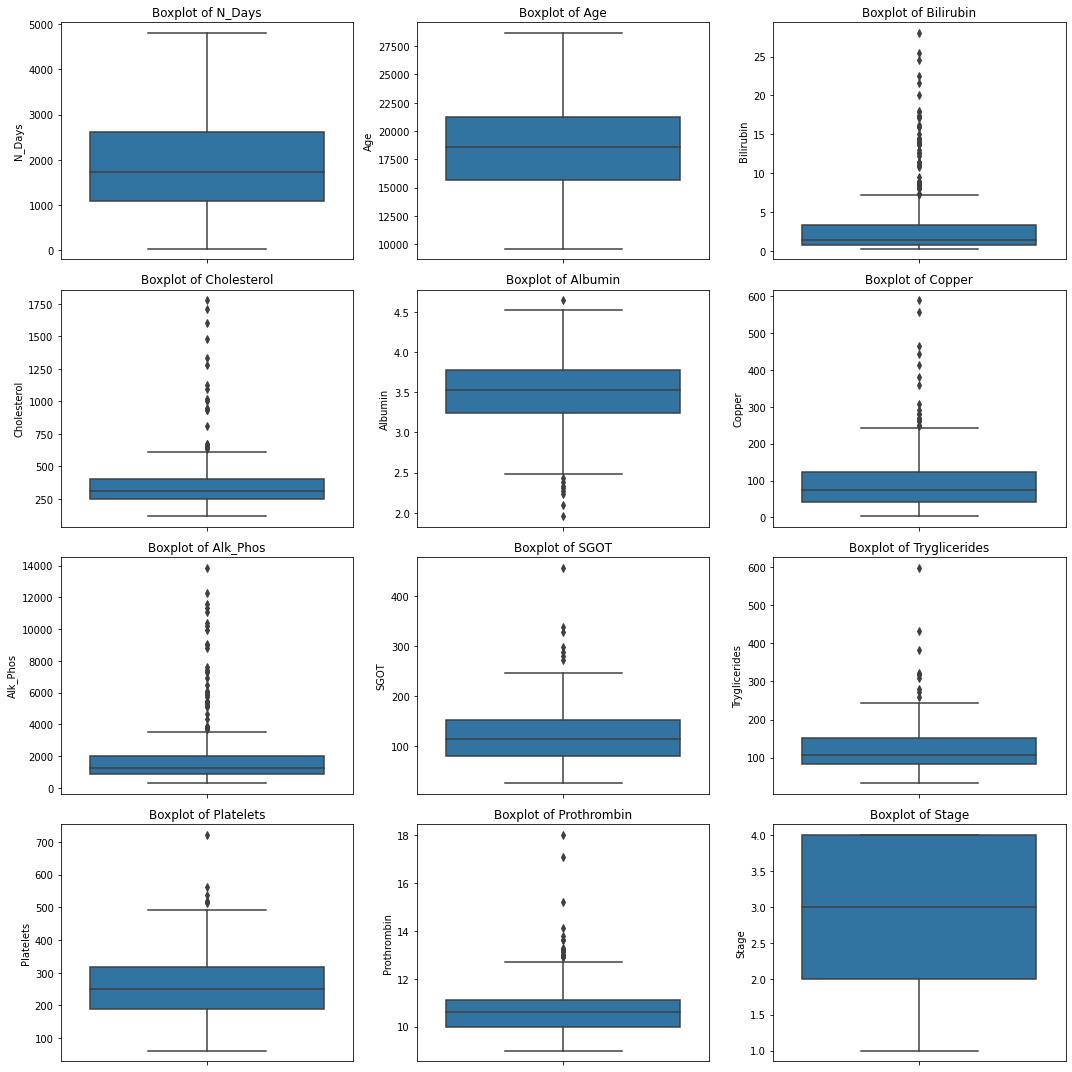

In [106]:
#Check for presence of outliers in each feature
cont= ele_df.dtypes[(ele_df.dtypes!='uint8') & (ele_df.dtypes!='bool')].index
plt.figure(figsize = (15,15))
feature_list = ele_df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y = ele_df_num[feature_list[i]], data = ele_df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Inference based on boxplots and outliers in the data set
1. We can see that almost all the columns have outlers except for 3 variables which are "Stage", "N-Days" and "Age".
2. Basically these are the levels chosen by people but are less in number and hence they are coming as outliers
3. We can treat these outliers using IQR range as these can be senssitive for the model development

### Histograms plots of various variables and their analysis

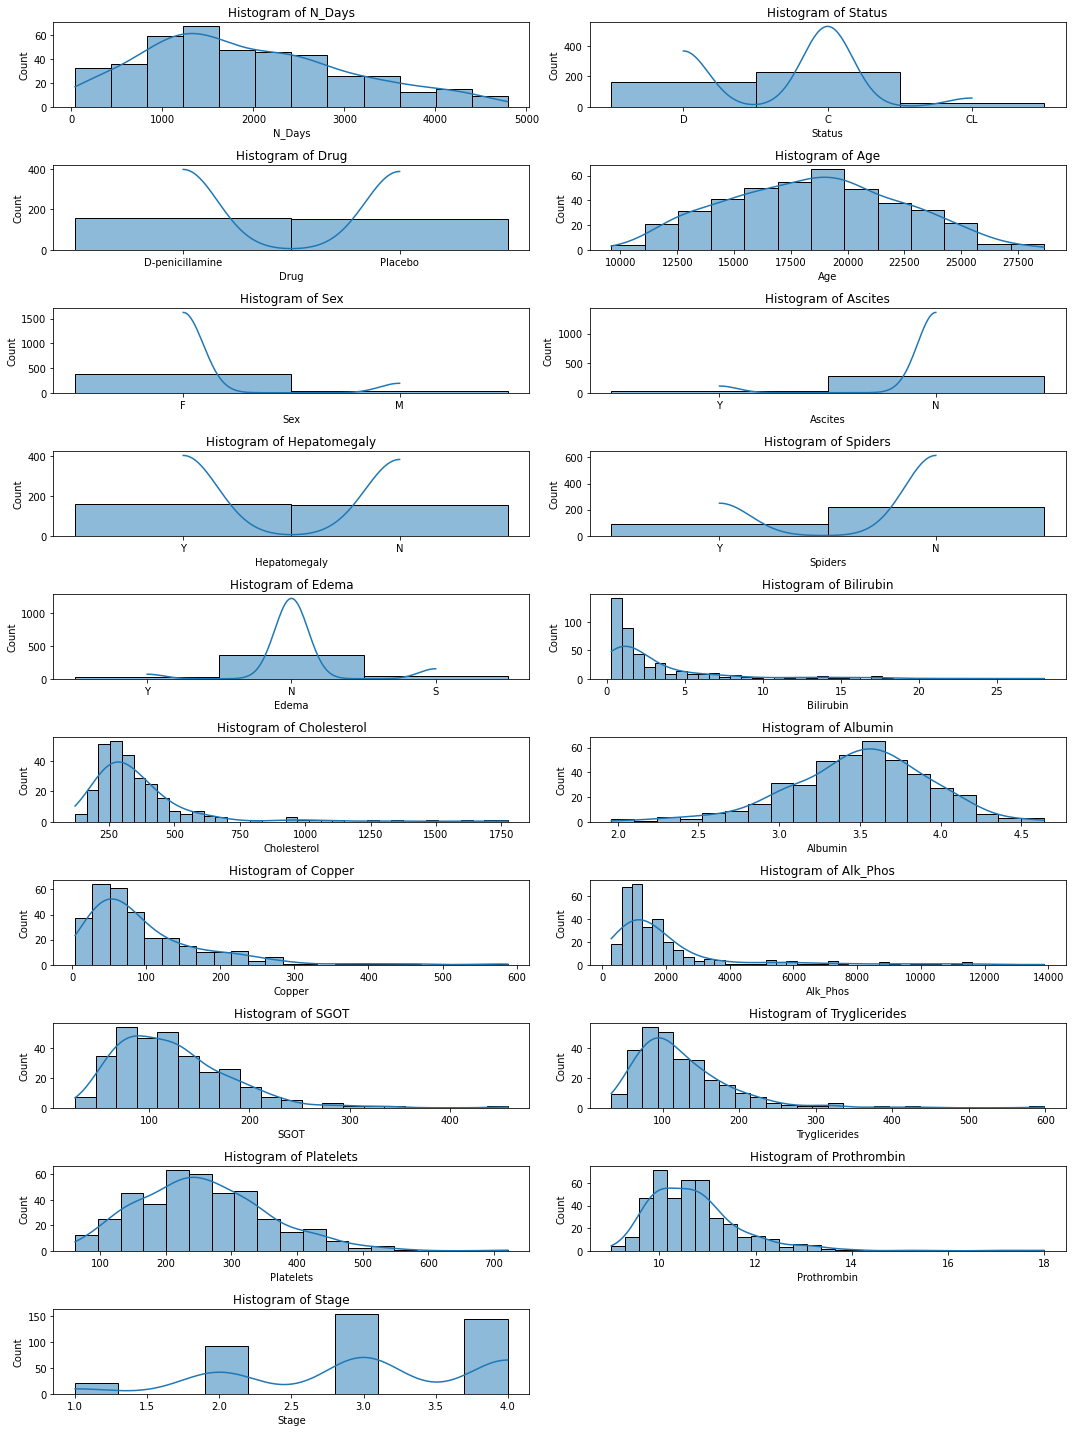

In [107]:
#Plotting histograms of each variables
plt.figure(figsize = (15,20))
feature_list = ele_df.columns
for i in range(len(feature_list)):
    plt.subplot(10, 2, i + 1)
    sns.histplot(x = ele_df[feature_list[i]], data = ele_df , kde= True)
    plt.title('Histogram of {}'.format(feature_list[i]))
    plt.tight_layout()

### Inference based on Boxplots, histograms and skewness of data:

1. N_Days: The distribution of N_Days is right-skewed, indicating that most patients have a shorter follow-up period, with fewer patients having longer follow-up periods.
2. Status: The majority of patients fall under the 'C' (censored) category, followed by 'D' (death). There are very few patients in the 'CL' (censored due to liver transplantation) category, indicating an imbalanced target variable.
3. Drug: The distribution is relatively balanced between patients receiving 'D-penicillamine' and 'Placebo'.
4. Age: The age distribution is roughly normal, with most patients aged between 15,000 and 20,000 days (approximately 41 to 55 years old).
5. Sex: There is a significant imbalance in gender distribution, with more female ('F') patients than male ('M') patients.
6. Ascites: The majority of patients do not have ascites ('N'), with a smaller number having ascites ('Y').
7. Hepatomegaly: The distribution of hepatomegaly is fairly balanced, with a slight tendency towards 'N' (no hepatomegaly).
8. Spiders: Most patients do not have spider angiomas ('N'), with fewer patients having them ('Y').
9. Edema: There are three categories: 'Y' (yes), 'N' (no), and 'S' (severe). The distribution shows that the majority of patients do not have edema ('N'), followed by 'Y', with very few having severe edema ('S').
10. Bilirubin: The bilirubin levels are right-skewed, with most patients having lower levels of bilirubin, and a few with higher levels.
11. Cholesterol: Right-skewed with a long tail, most values concentrated below 500.
12. Albumin: Approximately normal distribution, centered around 3.5.
13. Copper: Right-skewed, majority of values below 200.
14. Alk_Phos: Extremely right-skewed, most values clustered below 2000 with outliers extending to 14000.
15. SGOT: Right-skewed, majority of values below 200.
16. Tryglicerides: Right-skewed, most values below 200 with a few high outliers.
17. Platelets: Fairly symmetrical, slightly right-skewed, centered around 250-300.
18. Prothrombin: Slightly right-skewed, most values between 10-14.
19. Stage: Discrete values (1-4), with stages 3 and 4 being most common.

### Correlation of Features with each others

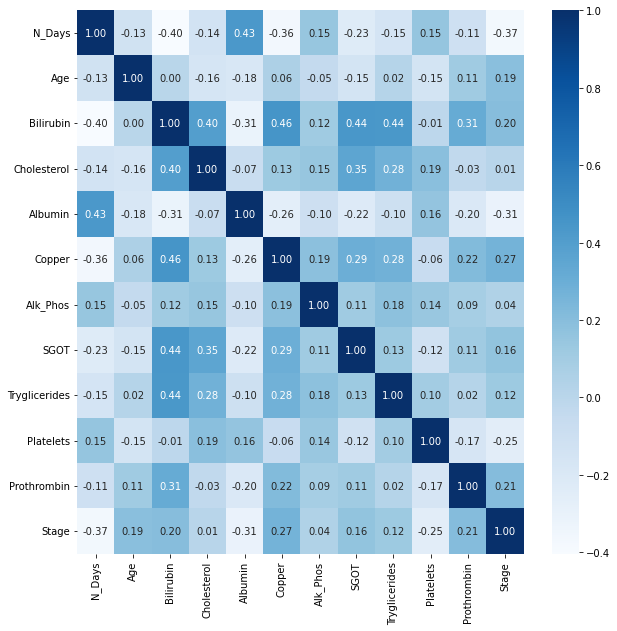

In [108]:
### Heat map
plt.figure(figsize=(10,10))
sns.heatmap(ele_df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

### Inference based on Correlation chart and Pair plot:

- Based on the correlation table, here are concise inferences:
- Strongest positive correlations:
    - Bilirubin with Cholesterol (0.40) and SGOT (0.44)
    - Copper with Bilirubin (0.46)
    - N_Days with Albumin (0.43)

- Strongest negative correlations:
    - N_Days with Bilirubin (-0.40) and Stage (-0.37)
    - Albumin with Bilirubin (-0.31) and Stage (-0.31)

- Age shows weak correlations with most variables, suggesting it's not a strong predictor of other factors.
- Platelets have weak correlations overall, with the strongest being a negative correlation with Stage (-0.25).
- Alk_Phos (Alkaline Phosphatase) shows relatively weak correlations with other variables.
- Stage has moderate negative correlations with N_Days and Albumin, and positive correlations with Bilirubin and Copper.
- Most variables show some degree of correlation with others, indicating complex relationships in liver cirrhosis progression.


## Null values Treatment:

1. Separating features into continuous and categorical lists.
2. Imputing missing values in continuous features with their median values.
3. Imputing missing values in categorical features with their most frequent values.
4. Applying these imputations directly to the original dataframe 'ele_df'.
5. Preparing the dataset for further analysis by eliminating missing values.



In [109]:
from sklearn.impute import SimpleImputer

# Define continuous and categorical features
continuous_features = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
categorical_features = ["Status",'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Impute numerical features with the mean
num_imputer = SimpleImputer(strategy='median')
ele_df[continuous_features] = num_imputer.fit_transform(ele_df[continuous_features])

# Impute categorical features with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
ele_df[categorical_features] = cat_imputer.fit_transform(ele_df[categorical_features])


### Checking Null values after Treatment:

In [110]:
ele_df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

### Treatment of outliers 
#### Removing the outliers using IQR method

In [111]:
ele_df_num = ele_df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(ele_df_num.columns.values)
lstnumericcolumns

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [112]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [113]:
cont= ele_df_num.dtypes[(ele_df_num.dtypes!='uint8') & (ele_df_num.dtypes!='bool')].index
for column in ele_df[cont].columns:
    lr,ur=remove_outlier(ele_df[column])
    ele_df[column]=np.where(ele_df[column]>ur,ur,ele_df[column])
    ele_df[column]=np.where(ele_df[column]<lr,lr,ele_df[column])

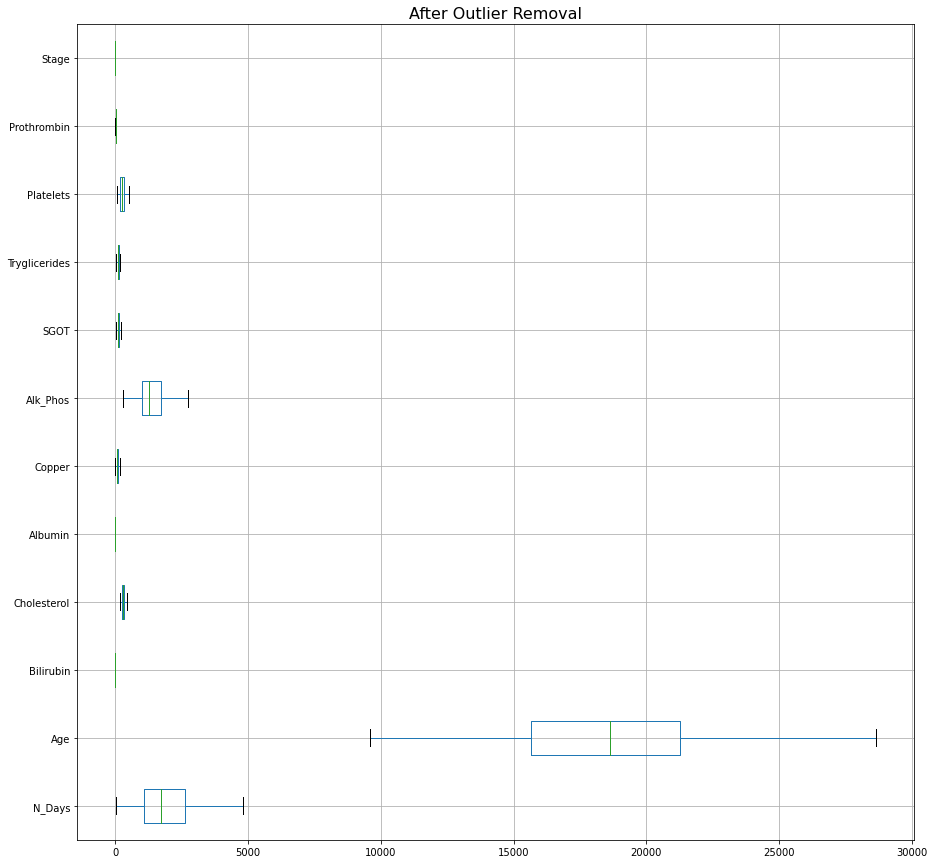

In [114]:
plt.figure(figsize=(15,15))
ele_df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### After Imputing the null values and the outliers lets check the summary of the data set

In [115]:
ele_df.describe().T

,count,mean,std,min,25%,50%,75%,max
N_Days,418.0,1917.782297,1104.672992,41.00000,1092.7500,1730.00,2613.50,4795.00000
Age,418.0,18533.351675,3815.845055,9598.00000,15644.5000,18628.00,21272.50,28650.00000
Bilirubin,418.0,2.492344,2.296591,0.30000,0.8000,1.40,3.40,7.30000
Cholesterol,418.0,318.137859,75.067557,160.87500,273.0000,309.50,347.75,459.87500
Albumin,418.0,3.501080,0.413492,2.45125,3.2425,3.53,3.77,4.56125
Copper,418.0,81.930622,45.909801,4.00000,51.2500,73.00,100.75,175.00000
Alk_Phos,418.0,1420.732057,638.326300,289.00000,1016.2500,1259.00,1707.75,2745.00000
SGOT,418.0,117.749545,40.147386,26.35000,91.0000,114.70,135.75,202.87500
Tryglicerides,418.0,112.911782,33.235903,45.87500,95.0000,108.00,127.75,176.87500
Platelets,418.0,256.029904,94.199467,62.00000,190.0000,251.00,315.50,503.75000


### Inference after null value iputation and Outliers Treatment:

1. Survival time: Average follow-up (N_Days) is about 5.25 years, with high variability (std ~3 years).
2. Age distribution: Patients range from young adults to elderly (15-86 years), average age around 51.
3. Liver function:Bilirubin levels are generally elevated (mean 2.49, normal <1.2 mg/dL), indicating impaired liver function.
4. Albumin levels are slightly low (mean 3.50, normal 3.5-5.0 g/dL), suggesting decreased liver synthetic function.
5. Inflammation markers: Elevated Alk_Phos (mean 1421) and SGOT (mean 118) indicate ongoing liver inflammation and damage.
6. Platelet counts: Mean of 256 is within normal range (150-450 thousand/μL), but wide variability exists.
7. Disease progression: Average stage is 3.02, indicating most patients have advanced disease.
8. Cholesterol and Triglycerides: Levels are within normal ranges, but with high variability.

**These points suggest a population with varying degrees of liver dysfunction, predominantly in advanced stages, which could inform treatment strategies and prognosis predictions.**

### Multivariate EDA of various columns:

#### Sum of Weights based on Airbag Type and The Gender of Drivers using bar plots and pie charts and analysis based on that result

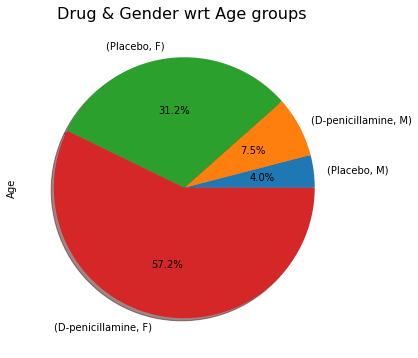

In [116]:
plt.figure(figsize = (6,6))
ele_df.groupby(['Drug', 'Sex']).sum()['Age'].sort_values().plot(kind='pie',autopct='%1.1f%%', shadow=True,)
plt.title('Drug & Gender wrt Age groups ',fontsize = 16);

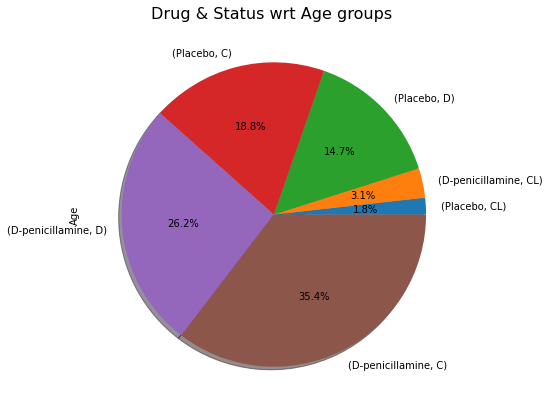

In [117]:
plt.figure(figsize = (7,7))
ele_df.groupby(['Drug', 'Status']).sum()['Age'].sort_values().plot(kind='pie',autopct='%1.1f%%', shadow=True,)
plt.title('Drug & Status wrt Age groups ',fontsize = 16);

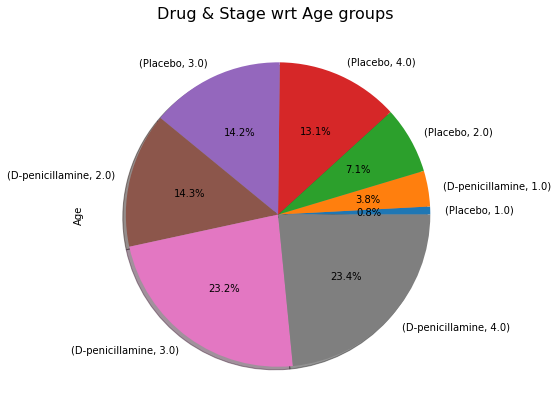

In [118]:
plt.figure(figsize = (7,7))
ele_df.groupby(['Drug', 'Stage']).sum()['Age'].sort_values().plot(kind='pie',autopct='%1.1f%%', shadow=True,)
plt.title('Drug & Stage wrt Age groups ',fontsize = 16);

### Inferernce: Let's look at some interesting points that emerge when considering all three pie charts together:

1. **Gender and Drug Interaction:** While females dominate the overall study population (88.4%), they seem to receive D-penicillamine more often than the placebo (57.2% vs 31.2%). This suggests a potential gender-based treatment preference or response.
2. **Age and Disease Progression:** Across all charts, age group 4.0 (likely the oldest group) appears most frequently. This correlates with higher disease stages (3.0 and 4.0) being more common, suggesting that the disease may progress or be diagnosed more often in older patients.
3. **Treatment Efficacy Paradox:** Despite D-penicillamine being used more frequently (60.9% overall), it's associated with a higher death rate (26.2%) compared to placebo (14.7%). This raises questions about its efficacy or whether it's being prescribed to more severe cases.
4. **Liver Transplantation Insights:** The small percentage of liver transplantations (CL status) in both drug groups (3.1% for D-penicillamine, 1.3% for placebo) might indicate either limited availability of transplants or that the disease doesn't frequently progress to requiring transplantation.
5. **Censoring Patterns:** The high rate of censoring (C status) in both groups, but especially in the D-penicillamine group (35.4%), could indicate challenges in long-term patient follow-up or that many patients' outcomes were still undetermined at the study's end.
6. **Stage-specific Treatment:** The distribution of disease stages differs between D-penicillamine and placebo groups, with D-penicillamine used more in stage 3.0. This might suggest targeted use of the drug for specific disease stages.
7. **Gender and Outcome Correlation:** Given the high proportion of females in the study, it would be interesting to investigate if the higher death rate in the D-penicillamine group is influenced by gender-specific responses to the treatment.
8. Age-related Treatment Response: The prevalence of older age groups across all charts suggests a potential correlation between age, disease severity, and treatment response that warrants further investigation.

These integrated observations highlight complex relationships between gender, age, disease stage, treatment choice, and outcomes in this study. They point to areas that might benefit from deeper statistical analysis to uncover significant patterns or correlations.

### Multivariate Analysis of categorical variables with Target variable 

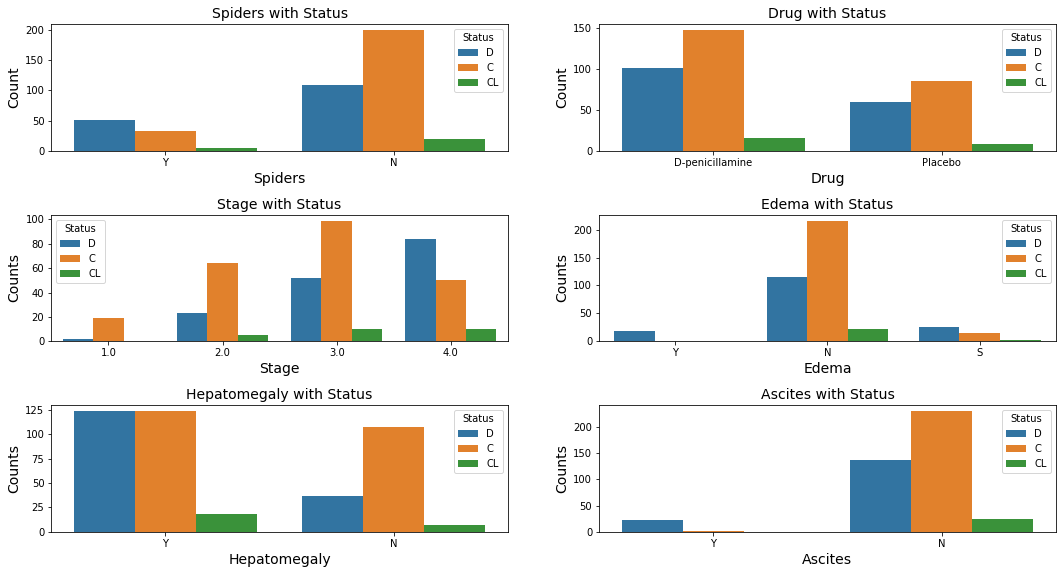

In [119]:
plt.figure(figsize=(18,6))
plt.subplot(321)
sns.countplot(x = ele_df['Spiders'],hue = ele_df['Status'])
plt.ylabel("Count",fontsize = 14)
plt.xlabel('Spiders',fontsize = 14)
plt.title('Spiders with Status',fontsize = 14)

plt.subplot(322)
sns.countplot(x = ele_df['Drug'],hue = ele_df['Status'])
plt.ylabel("Count",fontsize = 14)
plt.xlabel('Drug',fontsize = 14)
plt.title('Drug with Status',fontsize = 14)

plt.subplot(323)
sns.countplot(x = ele_df['Stage'],hue = ele_df['Status'])
plt.ylabel("Counts",fontsize = 14)
plt.xlabel('Stage',fontsize = 14)
plt.title('Stage with Status',fontsize = 14)

plt.subplot(324)
sns.countplot(data= ele_df, x='Edema' ,hue='Status')
plt.ylabel("Counts",fontsize = 14)
plt.xlabel('Edema',fontsize = 14)
plt.title('Edema with Status',fontsize = 14)

plt.subplot(325)
sns.countplot(x = ele_df['Hepatomegaly'],hue = ele_df['Status'])
plt.ylabel("Counts",fontsize = 14)
plt.xlabel('Hepatomegaly',fontsize = 14)
plt.title('Hepatomegaly with Status',fontsize = 14)

plt.subplot(326)
sns.countplot(x = ele_df['Ascites'],hue = ele_df['Status'])
plt.ylabel("Counts",fontsize = 14)
plt.xlabel('Ascites',fontsize = 14)
plt.title('Ascites with Status',fontsize = 14)
plt.subplots_adjust(hspace = 0.5, top = 1.3)
plt.show()

### Inference:

**Based on these bar graphs, here are brief inferences about the categorical variables:**
- Spiders: Most patients don't have spiders. Absence of spiders is associated with more censored (C) outcomes.
- Drug: D-penicillamine and Placebo groups are roughly balanced. D-penicillamine group has slightly more deaths (D) than the Placebo group.
- Stage: Higher stages (3 and 4) are associated with more deaths. Stage 4 has the highest proportion of deaths.
- Edema: Most patients don't have edema (N). Presence of edema (Y) is associated with more deaths.
- Hepatomegaly: Slightly more patients have hepatomegaly. Its presence is associated with more deaths.
- Ascites: Most patients don't have ascites. Its presence is associated with more deaths.

**Overall, the presence of clinical symptoms (spiders, edema, hepatomegaly, ascites) and higher disease stages are generally associated with worse outcomes (more deaths). The dataset shows class imbalance, with 'C' (censored) being the most common status across most categories.**

## Part 1.b & c. Split the data set into training and test set with a ratio of (8:2). Encode the data (having string values) for Modelling. We will see if Scaling necessary here or not, Data Split: Split the data into train and test (80:20). 

### Shape before splitting and encoding the data set

In [120]:
ele_df.shape

(418, 19)

### Encoding

- The data has string & categorical type variables, these variables must be encoded so that the Machine Learning model understands the data.
- We are encoding and getting the dummy variables first and then we will start the modelling part. Encoding categorical variables is important in machine learning because most algorithms require numerical inputs. Here's why we use a One Hot Encoder for this purpose.
- The data has string & categorical type variables, these variables must be encoded so that the Machine Learning model understands the data.
- Similarly, ordinal numbers are given to the values in variable gender.
- **Numerical Representation:** Machine learning algorithms operate on mathematical equations and computations, which require numerical inputs. Categorical variables like "Sex" or "Drug" (mode of transportation) need to be converted from their categorical labels (e.g., "Male", "Female") into numerical equivalents.
- **Consistency in Representation:** Label encoding ensures that categorical values are consistently represented with numerical values. For instance, if "Male" is encoded as 0 and "Female" as 1, the algorithm can interpret and compare these values effectively.
- **Compatibility with Algorithms:** Many machine learning algorithms, such as regression, decision trees, and SVMs, cannot directly handle categorical data. By encoding them into numerical form, these algorithms can process the data correctly.

In [121]:
# Encode the target variable "Status"
status_mapping = {'D': 0, 'C': 1, 'CL': 2}
ele_df['Status'] = ele_df['Status'].map(status_mapping)

# Apply one-hot encoding to other categorical features
categorical_features = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema"]
ele_df_encoded = pd.get_dummies(ele_df, columns=categorical_features, drop_first=True)

In [122]:
ele_df_encoded.shape

(418, 20)

In [123]:
ele_df_encoded.head()

,N_Days,Status,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,400.0,0,21464.0,7.3,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0,0,1,1,1,0,1
1,4500.0,1,20617.0,1.1,302.0,4.14,54.0,2745.0,113.52,88.0,221.0,10.6,3.0,0,0,0,1,1,0,0
2,1012.0,0,25594.0,1.4,176.0,3.48,175.0,516.0,96.10,55.0,151.0,12.0,4.0,0,1,0,0,0,1,0
3,1925.0,0,19994.0,1.8,244.0,2.54,64.0,2745.0,60.63,92.0,183.0,10.3,4.0,0,0,0,1,1,1,0
4,1504.0,2,13918.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,1,0,0,1,1,0,0


In [124]:
ele_df_encoded.columns

Index(['N_Days', 'Status', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
       'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage', 'Drug_Placebo', 'Sex_M', 'Ascites_Y',
       'Hepatomegaly_Y', 'Spiders_Y', 'Edema_S', 'Edema_Y'],
      dtype='object')

In [125]:
ele_df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
N_Days,418.0,1917.782297,1104.672992,41.00000,1092.7500,1730.00,2613.50,4795.00000
Status,418.0,0.674641,0.583036,0.00000,0.0000,1.00,1.00,2.00000
Age,418.0,18533.351675,3815.845055,9598.00000,15644.5000,18628.00,21272.50,28650.00000
Bilirubin,418.0,2.492344,2.296591,0.30000,0.8000,1.40,3.40,7.30000
Cholesterol,418.0,318.137859,75.067557,160.87500,273.0000,309.50,347.75,459.87500
Albumin,418.0,3.501080,0.413492,2.45125,3.2425,3.53,3.77,4.56125
Copper,418.0,81.930622,45.909801,4.00000,51.2500,73.00,100.75,175.00000
Alk_Phos,418.0,1420.732057,638.326300,289.00000,1016.2500,1259.00,1707.75,2745.00000
SGOT,418.0,117.749545,40.147386,26.35000,91.0000,114.70,135.75,202.87500
Tryglicerides,418.0,112.911782,33.235903,45.87500,95.0000,108.00,127.75,176.87500


### Preparing the Train and Test data set:

Data has to be split into 80:20 ratio: 

- The split data of both independent and dependent trained data (80%) is fit into the various model to predict target variable


In [126]:
from sklearn.model_selection import train_test_split

# Define features and target
X = ele_df_encoded.drop(columns='Status')
y = ele_df_encoded['Status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (334, 19)
y_train (334,)
X_test (84, 19)
y_test (84,)


In [127]:
X_train.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
336,2286.0,20454.0,1.8,309.5,3.64,73.0,1259.0,114.70,108.000,141.0,10.0,3.0,0,0,0,1,0,0,0
31,4523.0,19722.0,1.8,262.0,3.34,101.0,2745.0,82.56,158.000,286.0,10.6,4.0,1,0,0,1,0,0,0
84,3358.0,17246.0,2.1,262.0,3.48,58.0,2045.0,89.90,84.000,225.0,11.5,4.0,1,0,0,1,0,0,0
287,1067.0,17874.0,7.3,310.0,3.89,107.0,637.0,117.00,176.875,298.0,9.6,2.0,1,0,0,1,0,1,0
317,1680.0,15706.0,0.7,309.5,3.68,73.0,1259.0,114.70,108.000,306.0,9.5,2.0,0,0,0,1,0,0,0


In [128]:
y_train.head()

336    0
31     1
84     0
287    2
317    1
Name: Status, dtype: int64

## Part 1.d - Based on the training and test data, show the feature types and indicate which features are continuous or categorical.

### Identifying Feature Types:


### Features types before Encoding:

In [129]:
# Display the types of features
feature_types = ele_df.dtypes

# Identify continuous and categorical features
continuous_features_df = ele_df.select_dtypes(include=['float64', 'int64']).columns
categorical_features_df = ele_df.select_dtypes(include=['object', 'category']).columns

print(feature_types)
print("Continuous Features:", continuous_features_df)
print("Categorical Features:", categorical_features_df)


N_Days           float64
Status             int64
Drug              object
Age              float64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object
Continuous Features: Index(['N_Days', 'Status', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
       'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')
Categorical Features: Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


### Features of Train data set:

In [130]:
# Display the types of features
feature_types = X_train.dtypes

# Identify continuous and categorical features
continuous_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

print(feature_types)
print("Continuous Features:", continuous_features)
print("Categorical Features:", categorical_features)


N_Days            float64
Age               float64
Bilirubin         float64
Cholesterol       float64
Albumin           float64
Copper            float64
Alk_Phos          float64
SGOT              float64
Tryglicerides     float64
Platelets         float64
Prothrombin       float64
Stage             float64
Drug_Placebo        uint8
Sex_M               uint8
Ascites_Y           uint8
Hepatomegaly_Y      uint8
Spiders_Y           uint8
Edema_S             uint8
Edema_Y             uint8
dtype: object
Continuous Features: Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')
Categorical Features: Index([], dtype='object')


### Features of Test data:

In [131]:
# Display the types of features
feature_types = X_test.dtypes

# Identify continuous and categorical features
continuous_features = X_test.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_test.select_dtypes(include=['object', 'category']).columns

print(feature_types)
print("Continuous Features:", continuous_features)
print("Categorical Features:", categorical_features)


N_Days            float64
Age               float64
Bilirubin         float64
Cholesterol       float64
Albumin           float64
Copper            float64
Alk_Phos          float64
SGOT              float64
Tryglicerides     float64
Platelets         float64
Prothrombin       float64
Stage             float64
Drug_Placebo        uint8
Sex_M               uint8
Ascites_Y           uint8
Hepatomegaly_Y      uint8
Spiders_Y           uint8
Edema_S             uint8
Edema_Y             uint8
dtype: object
Continuous Features: Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')
Categorical Features: Index([], dtype='object')


### Information after encoding the data set

In [132]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 336 to 102
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   N_Days          334 non-null    float64
 1   Age             334 non-null    float64
 2   Bilirubin       334 non-null    float64
 3   Cholesterol     334 non-null    float64
 4   Albumin         334 non-null    float64
 5   Copper          334 non-null    float64
 6   Alk_Phos        334 non-null    float64
 7   SGOT            334 non-null    float64
 8   Tryglicerides   334 non-null    float64
 9   Platelets       334 non-null    float64
 10  Prothrombin     334 non-null    float64
 11  Stage           334 non-null    float64
 12  Drug_Placebo    334 non-null    uint8  
 13  Sex_M           334 non-null    uint8  
 14  Ascites_Y       334 non-null    uint8  
 15  Hepatomegaly_Y  334 non-null    uint8  
 16  Spiders_Y       334 non-null    uint8  
 17  Edema_S         334 non-null    u

## Part- 1.e Show the label distribution based on the training data, is it a balanced training set?

In [133]:
y_train.value_counts()

1    188
0    125
2     21
Name: Status, dtype: int64

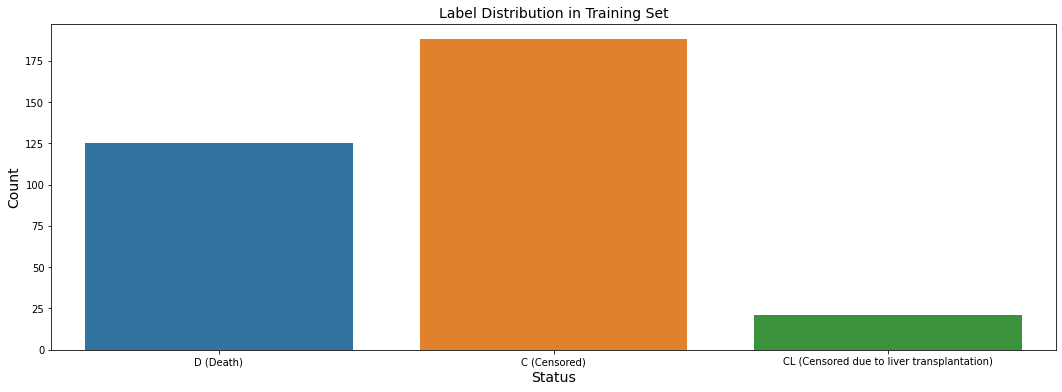

C (Censored)                                  0.562874
D (Death)                                     0.374251
CL (Censored due to liver transplantation)    0.062874
Name: Status, dtype: float64


In [134]:
# Mapping of status codes to their meanings
status_meanings = {0: 'D (Death)', 1: 'C (Censored)', 2: 'CL (Censored due to liver transplantation)'}
y_train_mapped = y_train.map(status_meanings)

# Plot the label distribution
plt.figure(figsize=(18,6))
sns.countplot(x=y_train_mapped)
plt.title("Label Distribution in Training Set", fontsize = 14)
plt.xlabel("Status", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

# Display the label distribution with meanings
label_distribution = y_train_mapped.value_counts(normalize=True)
print(label_distribution)


### Inference:

The training set is not balanced. A balanced dataset typically means that each class has roughly the same number of samples. In your case, the distribution of labels is as follows:

- C (Censored): 56.29%
- D (Death): 37.43%
- CL (Censored due to liver transplantation): 6.29%

**This shows that the majority class (C) is significantly more frequent than the other two classes, especially the CL class, which has the least representation. This imbalance can affect the performance of machine learning models, as they might become biased towards the majority class.**

### Scaling of the data set - Required or Not?

In [135]:
ele_df_encoded.describe()

,N_Days,Status,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1917.782297,0.674641,18533.351675,2.492344,318.137859,3.501080,81.930622,1420.732057,117.749545,112.911782,256.029904,10.683971,3.023923,0.368421,0.105263,0.057416,0.636364,0.215311,0.105263,0.047847
std,1104.672992,0.583036,3815.845055,2.296591,75.067557,0.413492,45.909801,638.326300,40.147386,33.235903,94.199467,0.840859,0.875678,0.482954,0.307260,0.232915,0.481622,0.411530,0.307260,0.213698
min,41.000000,0.000000,9598.000000,0.300000,160.875000,2.451250,4.000000,289.000000,26.350000,45.875000,62.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1092.750000,0.000000,15644.500000,0.800000,273.000000,3.242500,51.250000,1016.250000,91.000000,95.000000,190.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1730.000000,1.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2613.500000,1.000000,21272.500000,3.400000,347.750000,3.770000,100.750000,1707.750000,135.750000,127.750000,315.500000,11.100000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,4795.000000,2.000000,28650.000000,7.300000,459.875000,4.561250,175.000000,2745.000000,202.875000,176.875000,503.750000,12.750000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step: Scaling Numerical Features

We should scale numerical features to have them on the same scale, which is important for clustering algorithms like KMeans.

1. Scaling is required because we have different independent variables having vast range of values and having different units such as we can have data containing Distance which can be kilometres and can range from 1 to 1000s, and then we can have weight in Kgs which can range from 1 to 100. So comparison of these type of values together and their clustering is impossible unless and until they are scaled together having similar range.


2. Also if the data is not scaled it will affect the machine learning algorithm which is highly sensitive to range and scaling . Hence, scaling the data and bringing them in similar range makes the clustering process faster and increases the efficiency of our model

### For this we will first import a package Standard Scaler which will help us in scaling the data:

Min-Max Scaling and Standardization (Standard Scaling) are two common techniques used to normalize or scale features in a dataset, each with its own characteristics and use cases:

**Min-Max Scaling:**


**Formula: 𝑋 scaled = (𝑋 − 𝑋min)/(𝑋max − 𝑋min)** 

- Range: Transforms data to a fixed range, usually [0, 1].
- Effect: Shifts and scales the original data to a specific range. It's sensitive to outliers because it uses the minimum and maximum values.
- Use Cases: 
    * When the data distribution is not Gaussian (i.e., not normally distributed). 
    * When you want to preserve the original distribution shape of the data.
    * Algorithms that require features to be on a bounded interval, like [0, 1].

**Standardization (Standard Scaling):**
Formula: 

**𝑋 scaled = (𝑋 − 𝜇)/ 𝜎**

- Effect: Centers the data around 0 with a standard deviation of 1.
- Use Cases:
    * When the data follows a Gaussian distribution (approximately).
    * When dealing with algorithms that assume zero-centered data (e.g., PCA, clustering algorithms).
    * When the magnitude of the features is meaningful (e.g., in regression or classification problems).


### Hence, It is important to scale the features in a dataset before applying Logistic regression,LDA and KNN models. The reason for this is that LDA and KNN models are distance-based models, meaning that they calculate the distance between points in the feature space. Features with larger scales can dominate the distance measure, causing the model to pay more attention to those features and potentially ignoring the contribution of features with smaller scales. Scaling the features can help to balance the contribution of all features to the distance measure and can improve the performance of the model.

Note: - we will scale the data after splitting the data set and it will come under data preparation.


In [136]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [137]:
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of Y_train_scaled:", y_train.shape)
print("Shape of Y_test_scaled:", y_test.shape)

Shape of X_train_scaled: (334, 19)
Shape of X_test_scaled: (84, 19)
Shape of Y_train_scaled: (334,)
Shape of Y_test_scaled: (84,)


### Checking the shape of Training and Test data sets respectively:

In [138]:
print("no. of rows for X Train scaled data: ", X_train_scaled.shape[0], "\n""no. of columns for X Train scaled data: ", X_train_scaled.shape[1])

no. of rows for X Train scaled data:  334 
no. of columns for X Train scaled data:  19


In [139]:
print("no. of rows for X Test scaled data: ", X_test_scaled.shape[0], "\n""no. of columns for X Test scaled data: ", X_test_scaled.shape[1])

no. of rows for X Test scaled data:  84 
no. of columns for X Test scaled data:  19


In [140]:
print("no. of rows for y Train scaled data: ", y_train.shape, "\n""no. of columns for y Train scaled data: ", y_train.shape)

no. of rows for y Train scaled data:  (334,) 
no. of columns for y Train scaled data:  (334,)


In [141]:
print("no. of rows for y Test data: ", y_test.shape, "\n""no. of columns for y Test data: ", y_test.shape)

no. of rows for y Test data:  (84,) 
no. of columns for y Test data:  (84,)


### Inference:
- No of rows in X train data set is 334
- No of rows in X test dat set comes out to be 84 after splitting
- There are 19 attributes in the X train data set which will help us to develop a model for the target variable in the y data set

#  Section - 2. Based on the pre-processed training data from question 1, create three supervised machine learning (ML) models for predicting “Status”. 


## Step 2.a : Train Three Supervised Machine Learning Models. 

Use an appropriate validation method, report performance score using a suitable metric. Is it possible that the presented result is an under-fitted or over-fitted one? Justify. 

We will use these following models as our three models:
- Logistic Regression
- Random Forest
- Navie Bayes .

## Model - 1 Logistic Regression:

In [142]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

### Class label prediction

In [146]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_scaled, y_train)
y_log_predict_train = model1.predict(X_train_scaled)
y_log_predict_test = model1.predict(X_test_scaled)

In [147]:
pred_train = log_reg.predict(X_train_scaled)
pred_test = log_reg.predict(X_test_scaled)

In [149]:
y_train_pred_prob = log_reg.predict_proba(X_train_scaled)
pd.DataFrame(y_train_pred_prob).head()

,0,1,2
0,0.198457,0.792384,0.009159
1,0.241662,0.750787,0.007552
2,0.368821,0.622420,0.008759
3,0.150045,0.421447,0.428508
4,0.067584,0.845534,0.086882


In [150]:
y_test_pred_prob = log_reg.predict_proba(X_test_scaled)
pd.DataFrame(y_test_pred_prob).head()

,0,1,2
0,0.388418,0.607909,0.003672
1,0.177036,0.780339,0.042625
2,0.350163,0.639641,0.010195
3,0.896262,0.098019,0.005718
4,0.978357,0.021183,0.000460


In [151]:
print(model1.intercept_)

[ 0.69715798  1.18534691 -1.88250488]


### Feature Importance and coefficients of various features

In [152]:
model1.coef_

array([[-0.21157625,  0.64173474,  0.1624556 ,  0.15049222,  0.21009433,
         0.05227095,  0.51190966,  0.06882065, -0.11190296, -0.22455844,
         0.53583286,  0.03911766, -0.02123927, -0.05505254,  0.35687924,
        -0.12320342, -0.03377849, -0.05842232,  0.18174205],
       [ 0.42654419,  0.1908438 , -0.16561351, -0.04647441,  0.0344141 ,
        -0.28366896,  0.00928163, -0.05515846, -0.10412113, -0.22734032,
        -0.3183702 , -0.22724302,  0.09796849, -0.0871701 , -0.04966074,
        -0.17222487,  0.01235434, -0.12162319,  0.02405773],
       [-0.21496795, -0.83257855,  0.00315791, -0.1040178 , -0.24450843,
         0.23139801, -0.52119129, -0.01366219,  0.21602409,  0.45189876,
        -0.21746266,  0.18812536, -0.07672922,  0.14222265, -0.3072185 ,
         0.29542829,  0.02142414,  0.18004551, -0.20579978]])

### Evalutaion of Logistic Regression On Training and Test data

Logistic Regression Training Accuracy: 0.7874
Training Confusion Matrix:
[[ 87  37   1]
 [ 18 170   0]
 [  4  11   6]]
Training Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.74       125
           1       0.78      0.90      0.84       188
           2       0.86      0.29      0.43        21

    accuracy                           0.79       334
   macro avg       0.81      0.63      0.67       334
weighted avg       0.79      0.79      0.78       334



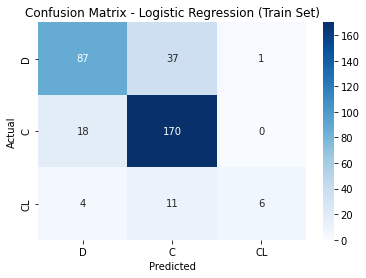

Logistic Regression Test Accuracy: 0.7857
Test Confusion Matrix:
[[27  9  0]
 [ 5 39  0]
 [ 2  2  0]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        36
           1       0.78      0.89      0.83        44
           2       0.00      0.00      0.00         4

    accuracy                           0.79        84
   macro avg       0.52      0.55      0.53        84
weighted avg       0.75      0.79      0.77        84



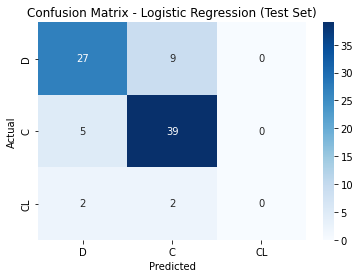

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on the training and test sets
y_train_pred_log_reg = log_reg.predict(X_train_scaled)
y_test_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model on the training set
accuracy_train_log_reg = accuracy_score(y_train, y_train_pred_log_reg)
conf_matrix_train_log_reg = confusion_matrix(y_train, y_train_pred_log_reg)
class_report_train_log_reg = classification_report(y_train, y_train_pred_log_reg)

print(f'Logistic Regression Training Accuracy: {accuracy_train_log_reg:.4f}')
print('Training Confusion Matrix:')
print(conf_matrix_train_log_reg)
print('Training Classification Report:')
print(class_report_train_log_reg)

# Plot confusion matrix for train set
sns.heatmap(conf_matrix_train_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=status_mapping.keys(), yticklabels=status_mapping.keys())
plt.title('Confusion Matrix - Logistic Regression (Train Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Evaluate the model on the test set
accuracy_test_log_reg = accuracy_score(y_test, y_test_pred_log_reg)
conf_matrix_test_log_reg = confusion_matrix(y_test, y_test_pred_log_reg)
class_report_test_log_reg = classification_report(y_test, y_test_pred_log_reg)

print(f'Logistic Regression Test Accuracy: {accuracy_test_log_reg:.4f}')
print('Test Confusion Matrix:')
print(conf_matrix_test_log_reg)
print('Test Classification Report:')
print(class_report_test_log_reg)

# Plot confusion matrix for test set
sns.heatmap(conf_matrix_test_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=status_mapping.keys(), yticklabels=status_mapping.keys())
plt.title('Confusion Matrix - Logistic Regression (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### AUC and ROC for the Testing data for Logistic Regression model:

**Explanation**
- Binarizing the Output: We convert the multiclass labels to a binary format using label_binarize.
- Training the Model: We use the OneVsRestClassifier to handle the multiclass classification.
- Predicting Probabilities: For logistic regression and Naive Bayes, we use decision_function and predict_proba respectively to get the scores.
- Computing ROC Curves: We compute the ROC curves and the area under the curve (AUC) for each class.
- Plotting ROC Curves: We plot the ROC curves for each class.
- These plots will help us visualize the performance of each model and compare them effectively.

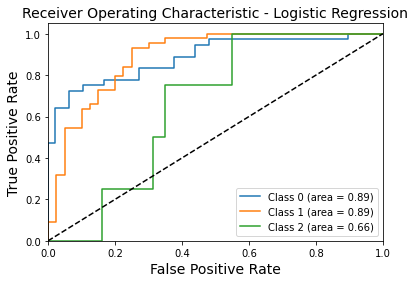

In [155]:
# Binarize the output
y_train_binarized = label_binarize(y_train, classes=[0, 1, 2])
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_train_binarized.shape[1]

# Train the model
log_reg = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42))
log_reg.fit(X_train_scaled, y_train_binarized)

# Predict probabilities
y_score_log_reg = log_reg.decision_function(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_log_reg[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.title('Receiver Operating Characteristic - Logistic Regression',fontsize = 14)
plt.legend(loc="lower right")
plt.show()


### Performance of Logistic Regression Model:

1. Overall Performance: **The model shows consistent accuracy across training (78.74%) and test (78.57%) sets, indicating good generalization.**
2. Class Imbalance: There's a noticeable class imbalance, with class 1 being the most prevalent and class 2 being the least represented in both datasets.
3. Performance by Class: Class 0 and 1: The model performs well for these classes, with good precision and recall in both training and test sets. 
4. Class 2: The model struggles significantly with this class, especially in the test set where it fails to predict any instances correctly.
5. **Overfitting for Class 2:** While the model shows some ability to predict class 2 in the training set (precision 0.86, recall 0.29), it completely fails on the test set. This suggests overfitting for this minority class.
6. High Recall for Class 1: The model has the highest recall for class 1 in both sets (0.90 in training, 0.89 in test), indicating it's good at identifying positive cases for this class.
7. Precision-Recall Trade-off: For class 0, there's a slight trade-off between precision and recall, with precision being higher than recall in both sets.
8. F1-Score Discrepancy: The f1-score for class 2 drops from 0.43 in training to 0.00 in testing, highlighting the model's inability to generalize for this class.
9. Macro vs Weighted Average: The significant difference between macro and weighted averages in the test set (0.53 vs 0.77 for f1-score) further emphasizes the impact of class imbalance on model performance.


### Interesting Insights:

- The model's consistent performance on classes 0 and 1 across training and test sets suggests it has learned meaningful patterns for these classes.
- The complete failure on class 2 in the test set, despite some success in training, indicates that the features used might not be sufficient to distinguish this class reliably.
- The high recall for class 1 suggests that if the model predicts a negative outcome (assuming class 1 is negative), it's likely to be correct. This could be valuable in scenarios where minimizing false negatives is crucial.
- The model's struggle with the minority class (2) highlights the need for techniques like oversampling, undersampling, or synthetic data generation to improve performance on imbalanced datasets.
- Despite the issues with class 2, the model's overall accuracy remains fairly high, indicating that classes 0 and 1 dominate the dataset and the model's predictions.

## Model - 2: Random Forest

Random Forest Training Accuracy: 1.0000
Training Confusion Matrix:
[[125   0   0]
 [  0 188   0]
 [  0   0  21]]
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       188
           2       1.00      1.00      1.00        21

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



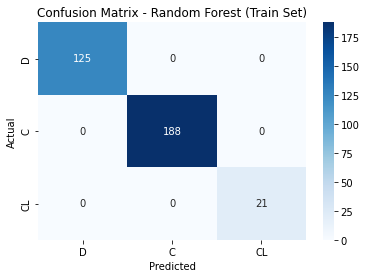

Random Forest Test Accuracy: 0.7976
Test Confusion Matrix:
[[28  8  0]
 [ 5 39  0]
 [ 1  3  0]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        36
           1       0.78      0.89      0.83        44
           2       0.00      0.00      0.00         4

    accuracy                           0.80        84
   macro avg       0.53      0.55      0.54        84
weighted avg       0.76      0.80      0.78        84



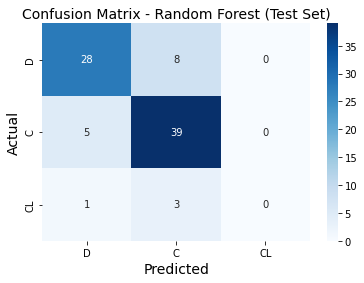

In [156]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Predict on the training and test sets
y_train_pred_rf = rf_clf.predict(X_train_scaled)
y_test_pred_rf = rf_clf.predict(X_test_scaled)

# Evaluate the model on the training set
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
conf_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
class_report_train_rf = classification_report(y_train, y_train_pred_rf)

print(f'Random Forest Training Accuracy: {accuracy_train_rf:.4f}')
print('Training Confusion Matrix:')
print(conf_matrix_train_rf)
print('Training Classification Report:')
print(class_report_train_rf)

# Plot confusion matrix for train set
sns.heatmap(conf_matrix_train_rf, annot=True, fmt='d', cmap='Blues', xticklabels=status_mapping.keys(), yticklabels=status_mapping.keys())
plt.title('Confusion Matrix - Random Forest (Train Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model on the test set
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
conf_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)
class_report_test_rf = classification_report(y_test, y_test_pred_rf)

print(f'Random Forest Test Accuracy: {accuracy_test_rf:.4f}')
print('Test Confusion Matrix:')
print(conf_matrix_test_rf)
print('Test Classification Report:')
print(class_report_test_rf)

# Plot confusion matrix for test set
sns.heatmap(conf_matrix_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=status_mapping.keys(), yticklabels=status_mapping.keys())
plt.title('Confusion Matrix - Random Forest (Test Set)',fontsize = 14)
plt.xlabel('Predicted',fontsize = 14)
plt.ylabel('Actual',fontsize = 14)
plt.show()


### AUC-ROC Curve for Random Forest Model:

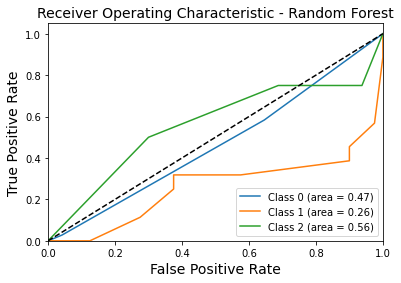

In [157]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_clf = OneVsRestClassifier(RandomForestClassifier(random_state=42))
rf_clf.fit(X_train_scaled, y_train_binarized)

# Predict probabilities
y_score_rf = rf_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.title('Receiver Operating Characteristic - Random Forest',fontsize = 14)
plt.legend(loc="lower right")
plt.show()


### Inference based on Random Forest Model:

1. **Overfitting:** The model shows perfect performance (100% accuracy) on the training set but significantly lower accuracy (79.76%) on the test set, indicating severe overfitting.
2. **Test Set Performance:** Despite overfitting, the model performs slightly better on the test set (79.76% accuracy) compared to the logistic regression model (78.57%).
3. **Class Imbalance:** The class imbalance issue persists, with class 2 being the minority class and most problematic for the model.
4. **Performance by Class:** Classes 0 and 1: The model performs well for these classes in the test set, with good precision and recall. Class 2: The model completely fails to predict this class in the test set, similar to the logistic regression model.
5. **Recall for Class 1:** The model maintains high recall (0.89) for class 1 in the test set, consistent with the logistic regression model.
6. **Precision Improvement:** There's a slight improvement in precision for class 0 (0.82 vs 0.79) compared to the logistic regression model.

### Recommendations:

- Address Overfitting: Implement regularization techniques such as reducing the maximum depth of trees or increasing the minimum samples required to split an internal node.
- Use cross-validation to tune hyperparameters and get a more robust estimate of model performance.
- Handle Class Imbalance: Apply techniques like oversampling (e.g., SMOTE), undersampling, or class weighting to address the imbalance, especially for class 2.
- Feature Engineering and Selection:Analyze feature importance to identify which features are most crucial for prediction.
- Evaluate with Appropriate Metrics: Given the class imbalance, consider using metrics like ROC AUC, precision-recall curve, or F2-score (if recall is more important) to get a more comprehensive view of model performance.
- Error Analysis: Conduct a detailed analysis of misclassified instances, especially for class 2, to understand what characteristics lead to incorrect predictions.


## Model -3 Naïve Bayes Model:

It is called due to assumption that the features in the dataset are mutually independent. It is simple method and fast in processing

In [158]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [159]:
NB_model = GaussianNB()
NB_model.fit(X_train_scaled, y_train)

GaussianNB()

Naive Bayes Training Accuracy: 0.1317
Training Confusion Matrix:
[[ 21   0 104]
 [  2   2 184]
 [  0   0  21]]
Training Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.17      0.28       125
           1       1.00      0.01      0.02       188
           2       0.07      1.00      0.13        21

    accuracy                           0.13       334
   macro avg       0.66      0.39      0.14       334
weighted avg       0.91      0.13      0.13       334



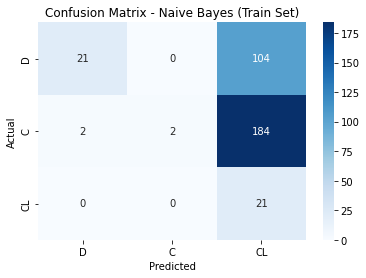

Naive Bayes Test Accuracy: 0.1310
Test Confusion Matrix:
[[ 7  0 29]
 [ 0  0 44]
 [ 0  0  4]]
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.19      0.33        36
           1       0.00      0.00      0.00        44
           2       0.05      1.00      0.10         4

    accuracy                           0.13        84
   macro avg       0.35      0.40      0.14        84
weighted avg       0.43      0.13      0.14        84



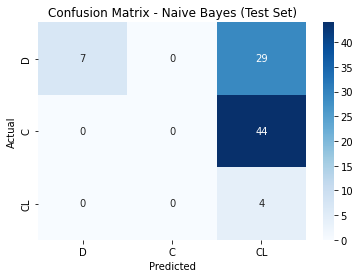

In [160]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_clf = GaussianNB()
nb_clf.fit(X_train_scaled, y_train)

# Predict on the training and test sets
y_train_pred_nb = nb_clf.predict(X_train_scaled)
y_test_pred_nb = nb_clf.predict(X_test_scaled)

# Evaluate the model on the training set
accuracy_train_nb = accuracy_score(y_train, y_train_pred_nb)
conf_matrix_train_nb = confusion_matrix(y_train, y_train_pred_nb)
class_report_train_nb = classification_report(y_train, y_train_pred_nb)

print(f'Naive Bayes Training Accuracy: {accuracy_train_nb:.4f}')
print('Training Confusion Matrix:')
print(conf_matrix_train_nb)
print('Training Classification Report:')
print(class_report_train_nb)

# Plot confusion matrix for train set
sns.heatmap(conf_matrix_train_nb, annot=True, fmt='d', cmap='Blues', xticklabels=status_mapping.keys(), yticklabels=status_mapping.keys())
plt.title('Confusion Matrix - Naive Bayes (Train Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model on the test set
accuracy_test_nb = accuracy_score(y_test, y_test_pred_nb)
conf_matrix_test_nb = confusion_matrix(y_test, y_test_pred_nb)
class_report_test_nb = classification_report(y_test, y_test_pred_nb)

print(f'Naive Bayes Test Accuracy: {accuracy_test_nb:.4f}')
print('Test Confusion Matrix:')
print(conf_matrix_test_nb)
print('Test Classification Report:')
print(class_report_test_nb)

# Plot confusion matrix for test set
sns.heatmap(conf_matrix_test_nb, annot=True, fmt='d', cmap='Blues', xticklabels=status_mapping.keys(), yticklabels=status_mapping.keys())
plt.title('Confusion Matrix - Naive Bayes (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### AUC-ROC Curve for Naive Bayes Model:

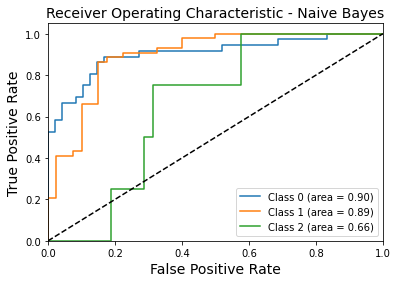

In [161]:
from sklearn.naive_bayes import GaussianNB

# Train the model
nb_clf = OneVsRestClassifier(GaussianNB())
nb_clf.fit(X_train_scaled, y_train_binarized)

# Predict probabilities
y_score_nb = nb_clf.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_nb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.title('Receiver Operating Characteristic - Naive Bayes',fontsize = 14)
plt.legend(loc="lower right")
plt.show()


### Reason and Inference:

#### The most important Model Evaluation metric here is Recall. 

Here are the key inferences and reasons for its poor performance:

1. **Extremely low accuracy:** The model performs poorly on both training (13.17%) and test (13.10%) sets.
2. **Severe bias towards class 2:** The model predicts class 2 for almost all instances, resulting in perfect recall but very low precision for this class.
3. **Poor performance on majority classes:** The model fails to correctly classify most instances of classes 0 and 1, especially in the test set.
4. **Inconsistent precision:** While precision for class 0 is high, it's misleading due to very low recall.
5. **Failure on class 1:** In the test set, the model completely fails to predict any instances of class 1 correctly.

### Reasons for poor performance compared to previous models:
- Violation of independence assumption: Naive Bayes assumes feature independence, which may not hold for this dataset, leading to poor predictions.
- **Sensitivity to class imbalance: Naive Bayes can be heavily influenced by class imbalance, which is evident in this dataset.**
- Inappropriate for the data distribution: The underlying data distribution might not be suitable for the Gaussian Naive Bayes assumption.
- **Feature scaling issues: Naive Bayes is sensitive to feature scales, and lack of proper scaling could contribute to poor performance.**
- Complexity of the problem: The classification task may be too complex for the simple Naive Bayes model to capture effectively.
- Potential data issues: There might be data quality problems or a mismatch between the features and the target variable that Naive Bayes is particularly sensitive to.

In summary, the Naive Bayes model's assumptions and simplicity make it ill-suited for this particular dataset and classification task, resulting in significantly worse performance compared to the Logistic Regression and Random Forest models.


## Part- 2.b Justify different design decisions for each ML model used to answer this question

**Logistic Regression**

1. Design Decision:
    - Choice of Model: Logistic Regression is chosen because it is a simple and interpretable linear model that is often used for binary and multiclass classification problems. It works well when the relationship between the features and the target variable is approximately linear.
    - One-vs-Rest (OvR) Strategy: For multiclass classification, we use the One-vs-Rest strategy which involves training one classifier per class. This is suitable for Logistic Regression as it can handle binary classification efficiently.
    - Regularization: Regularization (L2 by default) is used to prevent overfitting by penalizing large coefficients. This helps in improving the generalizability of the model.
    - Hyperparameters: The main hyperparameter tuned here is max_iter to ensure the model converges.

2. Justification:
    - Logistic Regression is straightforward to implement and interpret, making it a good starting point for classification tasks.
    - Regularization helps in dealing with overfitting, especially with high-dimensional data.
    - The One-vs-Rest strategy simplifies the multiclass classification problem into multiple binary problems, which is computationally efficient for logistic regression.

**Random Forest**
1. Design Decision:
    - Choice of Model: Random Forest is an ensemble learning method that builds multiple decision trees and merges them to get a more accurate and stable prediction. It is chosen because it can handle non-linear relationships and interactions between features.
    - Number of Trees (n_estimators): More trees generally improve the performance but also increase computational cost. A typical choice is around 100 trees.
    - Depth of Trees (max_depth): Limiting the depth of the trees helps in reducing overfitting. This is tuned based on cross-validation.
    - Randomization (random_state): Setting a random seed ensures reproducibility of results.
    - Handling Imbalance: Random Forest inherently deals with imbalance by bootstrap sampling, but further techniques like class weights can be used if needed.

2. Justification:
    - Random Forests are robust to overfitting due to averaging multiple trees, making them a strong choice for complex datasets.
    - They can handle both numerical and categorical data, as well as missing values to some extent.
    - They provide feature importance which helps in understanding the impact of each feature on the prediction.

**Naive Bayes**

1. Design Decision:
    - Choice of Model: Naive Bayes is a probabilistic classifier based on Bayes' Theorem with the assumption of feature independence. It is chosen for its simplicity and efficiency, especially with high-dimensional datasets.
    - Gaussian Naive Bayes: Since most features are continuous, Gaussian Naive Bayes is used, which assumes that the continuous values associated with each class are distributed according to a Gaussian distribution.
    - No Hyperparameter Tuning: Naive Bayes has few hyperparameters, making it computationally efficient and simple to implement.

2. Justification:
    - Naive Bayes is very fast and efficient, especially suitable for large datasets.
    - It performs well even with a small amount of data and provides probabilistic predictions which can be useful for certain applications.
    - Despite the strong assumption of independence, Naive Bayes often performs well in practice for many real-world datasets.

**Summary**
- Logistic Regression: Chosen for its simplicity and interpretability. Regularization helps in handling overfitting. The OvR strategy effectively handles multiclass classification.
- Random Forest: Chosen for its ability to handle complex, non-linear relationships and robustness against overfitting. Feature importance and inherent handling of missing values and imbalance are added advantages.
- Naive Bayes: Chosen for its simplicity, efficiency, and good performance with high-dimensional data. Suitable for quick baseline modeling.

## Part - 2.c Have you optimized any hyper-parameters for each ML model? What are they? Why have you done that? Explain

Hyperparameter tuning is crucial for improving the performance of machine learning models. Here, we'll optimize the hyperparameters for Logistic Regression, Random Forest, and Naive Bayes. We'll use GridSearchCV for this purpose, which performs an exhaustive search over specified parameter values for an estimator.

### Hyperparameter Tuning for Logistic Regression: Grid search on logistic regression model

We'll use the GridSearchCV with the provided parameter grid and the recall_score as the scoring metric.

Grid Search CV on Logistic regression model and their parameters:

1.	The penalty parameter is used to specify the type of regularization to use in some machine learning models. It’s important to keep in mind that the optimal value of penalty will depend on the specific problem and the model that you are using, so it's a good idea to try a range of values and see which one works best on your specific dataset.
2.	The solver parameter is used to specify the optimization algorithm to use in some machine learning models
3.	The tol parameter stands for tolerance, and it is used to control the convergence of iterative optimization algorithms. In the context of a grid search, the tol parameter specifies the tolerance for the change in the loss function between iterations.
4.	The l1_ratio parameter is used in elastic net regularization, which is a combination of l1 and l2 regularization. The l1_ratio parameter determines the balance between l1 and l2 regularization. A value of 0 corresponds to l2 regularization, and a value of 1 corresponds to l1 regularization. A value between 0 and 1 corresponds to a combination of l1 and l2 regularization.


In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_lr = {
    'penalty': ['l2', 'none', 'l1', 'elasticnet'],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1],  # This is only used for 'elasticnet' penalty
    'solver': ['sag', 'lbfgs', 'saga', 'newton-cg', 'liblinear'],
    'tol': [0.0001, 1e-05, 0.001, 0.01, 0.1]
}

# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Define the scorer
scorer = make_scorer(recall_score, average='macro')

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, scoring=scorer, n_jobs=-1)

# Fit the model
grid_search_lr.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print(f"Best parameters for Logistic Regression: {best_params_lr}")
print(f"Best cross-validation recall for Logistic Regression: {best_score_lr:.4f}")


Best parameters for Logistic Regression: {'l1_ratio': 0.75, 'penalty': 'elasticnet', 'solver': 'saga', 'tol': 0.1}
Best cross-validation recall for Logistic Regression: 0.5501


### Explanation of Hyperparameter Tuning

Logistic Regression: The C parameter controls the regularization strength. By tuning it, we can find a balance between bias and variance. The solver parameter determines the optimization algorithm, which can affect convergence and performance.

### Logic for selecting these parameters:

1. When l1_ratio is set to 1, the model uses only L1 regularization, which adds a penalty proportional to the absolute value of the coefficients. When l1_ratio is set to 0, the model uses only L2 regularization, which adds a penalty proportional to the square of the coefficients.
2. The value of penalty specifies the type of regularization it will use. A value of 'l1' indicates that the model will use L1 regularization.
3. The value of solver specifies the solver to use when fitting the model. A value of 'saga' indicates that the model will use the SAGA (Stochastic Average Gradient Descent) solver. The SAGA solver is an iterative solver that is well-suited for large datasets and for L1 regularization.
4. A value of 0.01 indicates that the solver will stop when the difference between the objective function values between two consecutive iterations is less than 0.01. This can help to prevent the solver from running for too long or from overfitting the training data. 

Hence, The logic behind these hyperparameters is to use L1 regularization and the SAGA solver to fit a logistic regression model with a high level of tolerance for the solver which can actually help in case of high level of noise in the data set.


### Performance metrics: On best parameters of Logistic Regression
#### Classification report – Train Data

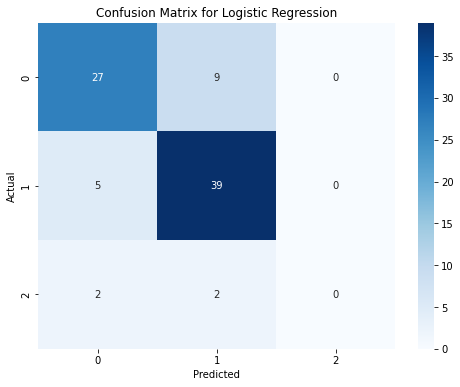

Classification Report for Logistic Regression:
                                            precision    recall  f1-score   support

                                 D (Death)       0.79      0.75      0.77        36
                              C (Censored)       0.78      0.89      0.83        44
CL (Censored due to liver transplantation)       0.00      0.00      0.00         4

                                  accuracy                           0.79        84
                                 macro avg       0.52      0.55      0.53        84
                              weighted avg       0.75      0.79      0.77        84



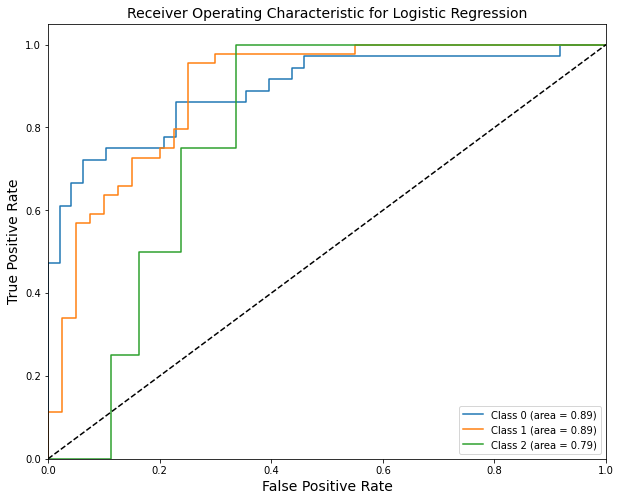

In [163]:
# Predict on the test set
y_pred_test_lr = grid_search_lr.predict(X_test_scaled)
y_prob_test_lr = grid_search_lr.predict_proba(X_test_scaled)

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_test_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_test_lr, target_names=['D (Death)', 'C (Censored)', 'CL (Censored due to liver transplantation)']))

# AUC-ROC curve
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(grid_search_lr.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob_test_lr[:, i], pos_label=grid_search_lr.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot AUC-ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(grid_search_lr.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.title('Receiver Operating Characteristic for Logistic Regression',fontsize = 14)
plt.legend(loc="lower right")
plt.show()


### Inference:

The Accuracy, Recall and Precision seems to be the same as per the original model, or we can the original model without tuning is slightly better in terms of Recall values and f1-score also, there are slight 
variation in the AUC score. 
There does not seem to be much of an improvement in the figures, therefore let us try to build an Random Forest model 
to get better performance.

### Random Forest: Hyperparameters to Optimize:

- n_estimators: Number of trees in the forest.
- max_depth: Maximum depth of the tree.
- min_samples_split: Minimum number of samples required to split an internal node.
- min_samples_leaf: Minimum number of samples required to be at a leaf node.

In [179]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [218]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 5,7]
}

# Initialize the model
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best parameters for Random Forest: {best_params_rf}")
print(f"Best cross-validation accuracy for Random Forest: {best_score_rf:.4f}")


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation accuracy for Random Forest: 0.7724


### Explanation of Hyperparameter Tuning:

**Random Forest:**

- n_estimators: More trees can improve performance but also increase computational cost.
- max_depth: Controls the depth of each tree, preventing overfitting by limiting the growth of the trees.
- min_samples_split and min_samples_leaf: These parameters ensure that nodes have a minimum number of samples before splitting or being a leaf, which helps in controlling overfitting.

In [219]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

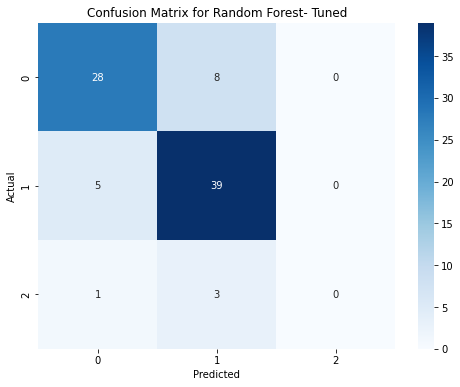

Classification Report for Random Forest - Tuned:
                                            precision    recall  f1-score   support

                                 D (Death)       0.82      0.78      0.80        36
                              C (Censored)       0.78      0.89      0.83        44
CL (Censored due to liver transplantation)       0.00      0.00      0.00         4

                                  accuracy                           0.80        84
                                 macro avg       0.53      0.55      0.54        84
                              weighted avg       0.76      0.80      0.78        84



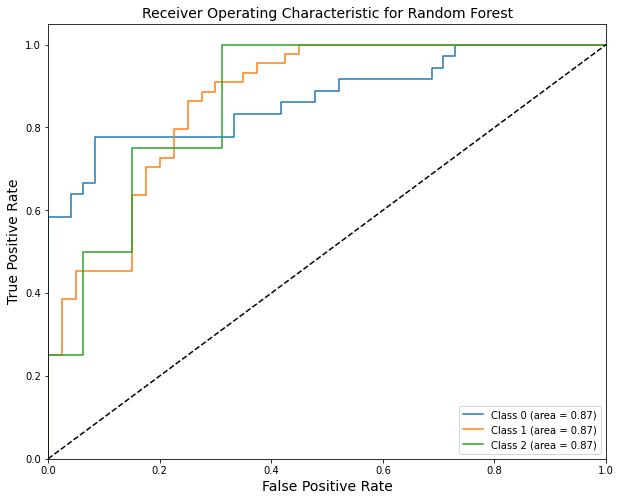

In [220]:
# Predict on the test set
y_pred_test_rf = grid_search_rf.predict(X_test_scaled)
y_prob_test_rf = grid_search_rf.predict_proba(X_test_scaled)

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_test_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest- Tuned')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report for Random Forest - Tuned:")
print(classification_report(y_test, y_pred_test_rf, target_names=['D (Death)', 'C (Censored)', 'CL (Censored due to liver transplantation)']))

# AUC-ROC curve
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(grid_search_rf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob_test_rf[:, i], pos_label=grid_search_rf.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot AUC-ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(grid_search_rf.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.title('Receiver Operating Characteristic for Random Forest',fontsize = 14)
plt.legend(loc="lower right")
plt.show()


### Inference based on Hypertuned Random Forest Model:

1. Overall Performance: The model demonstrates good overall performance with an accuracy of 80% on the test set.
2. The weighted average F1-score of 0.78 indicates balanced precision and recall across classes.
3. ROC-AUC Performance: All three classes show an impressive Area Under the Curve (AUC) of 0.87, indicating excellent discriminative ability.
4. The ROC curves for all classes are well above the diagonal line, suggesting the model performs significantly better than random guessing for all classes.

1. **Class-wise Performance:**
    - Class D (Death): Good balance between precision (0.82) and recall (0.78), with an F1-score of 0.80.
    - Class C (Censored): Highest recall (0.89) among all classes, with a solid F1-score of 0.83.
    - Class CL (Censored due to liver transplantation): The model struggles with this minority class, failing to predict any instances correctly.

2. **Confusion Matrix Insights:** 
    - Most misclassifications occur between classes 0 (D) and 1 (C), with 8 instances of class 0 predicted as class 1, and 5 instances of class 1 predicted as class 0.

    - The model never predicts class 2 (CL), likely due to its rarity in the dataset.

3. Handling of Imbalanced Data:
    - Despite the class imbalance, the model performs well for the two majority classes (D and C).
    - The failure on class CL is likely due to its extremely low representation in the dataset (only 4 instances in the test set).

4. Model Improvement: Compared to the initial Random Forest model, this tuned version maintains the same overall accuracy but shows more balanced performance across classes 0 and 1.

**In conclusion, this tuned Random Forest model shows promising results for predicting patient outcomes, particularly for the Death and Censored classes. However, its inability to handle the rare Censored due to liver transplantation class suggests that further refinement, possibly through advanced sampling techniques or ensemble methods, could lead to even better overall performance.**

### Hyperparameter Tuning and Evaluation for Naive Bayes

In [221]:

# Initialize the model
nb = GaussianNB()

# Naive Bayes generally does not have hyperparameters to tune, but you can still perform cross-validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores_nb = cross_val_score(nb, X_train_scaled, y_train, cv=5, scoring=scorer)

print(f"Cross-validation recall for Naive Bayes: {cv_scores_nb.mean():.4f}")

# Fit the model on the training set
nb.fit(X_train_scaled, y_train)

Cross-validation recall for Naive Bayes: 0.4127


GaussianNB()

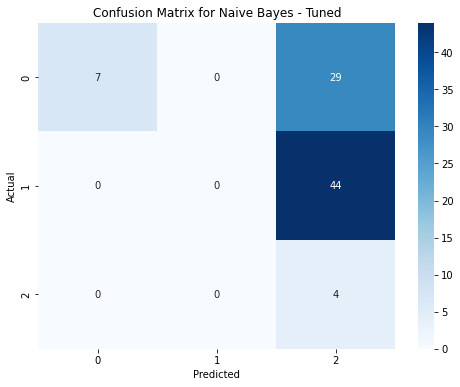

Classification Report for Naive Bayes - Tuned:
                                            precision    recall  f1-score   support

                                 D (Death)       1.00      0.19      0.33        36
                              C (Censored)       0.00      0.00      0.00        44
CL (Censored due to liver transplantation)       0.05      1.00      0.10         4

                                  accuracy                           0.13        84
                                 macro avg       0.35      0.40      0.14        84
                              weighted avg       0.43      0.13      0.14        84



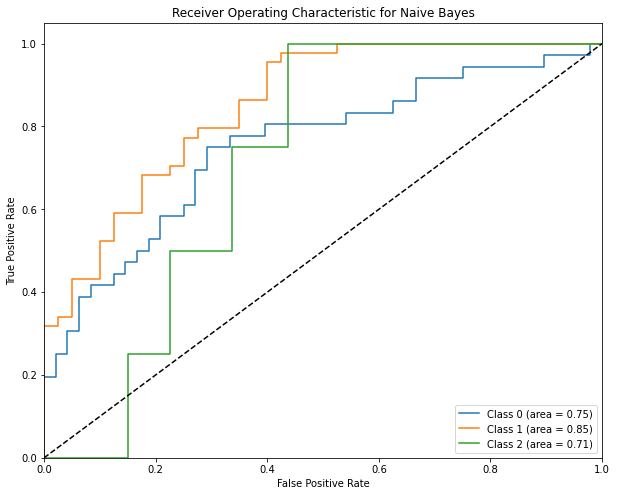

In [222]:
# Predict on the test set
y_pred_test_nb = nb.predict(X_test_scaled)
y_prob_test_nb = nb.predict_proba(X_test_scaled)

# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_test_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes - Tuned')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report for Naive Bayes - Tuned:")
print(classification_report(y_test, y_pred_test_nb, target_names=['D (Death)', 'C (Censored)', 'CL (Censored due to liver transplantation)']))

# AUC-ROC curve
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(nb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob_test_nb[:, i], pos_label=nb.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot AUC-ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(nb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Naive Bayes')
plt.legend(loc="lower right")
plt.show()


### Inference:
There is no such improvement in this model even after a bit tunning. So we ill move ahead and try to deal with class imbalance in the data set because of which we can see so many low scores of metrices in various models as class imbalance is evident.

## Part - 2.d: Use a method to deal with the label imbalance issue and indicate whetherthere is a model improvement after you balance the dataset.

To address the label imbalance issue using **SMOTE (Synthetic Minority Over-sampling Technique)**, we can apply SMOTE to the training data and then train and evaluate the models again.

### In this method we will use SMOTE to create Balance in the data set:

1. SMOTE is applied to the training data to balance the classes.
2. The three models (Logistic Regression, Random Forest, and Naive Bayes) are trained on the SMOTE-processed training data.
3. Each model is evaluated on the test set, and the confusion matrix and AUC-ROC curves are plotted.

In [223]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [236]:
X_train_smote.shape

(564, 19)

In [237]:
y_train_smote.shape

(564,)

In [224]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to plot AUC-ROC curve
def plot_auc_roc(y_test, y_prob, classes, title):
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=classes[i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate' , fontsize = 14)
    plt.ylabel('True Positive Rate', fontsize = 14)
    plt.title(f'Receiver Operating Characteristic for {title}' ,fontsize = 14)
    plt.legend(loc="lower right")
    plt.show()


## Evaluate Logistic Regression with SMOTE

Classification Report for Logistic Regression with SMOTE:
                                            precision    recall  f1-score   support

                                 D (Death)       0.73      0.75      0.74        36
                              C (Censored)       0.78      0.64      0.70        44
CL (Censored due to liver transplantation)       0.09      0.25      0.13         4

                                  accuracy                           0.67        84
                                 macro avg       0.53      0.55      0.52        84
                              weighted avg       0.72      0.67      0.69        84



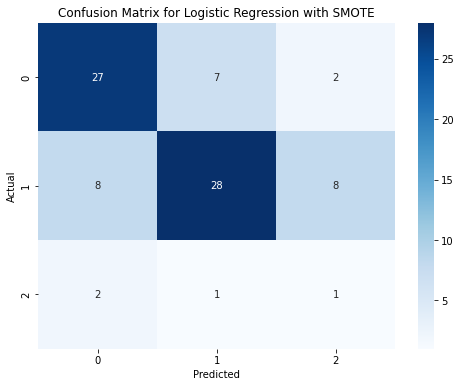

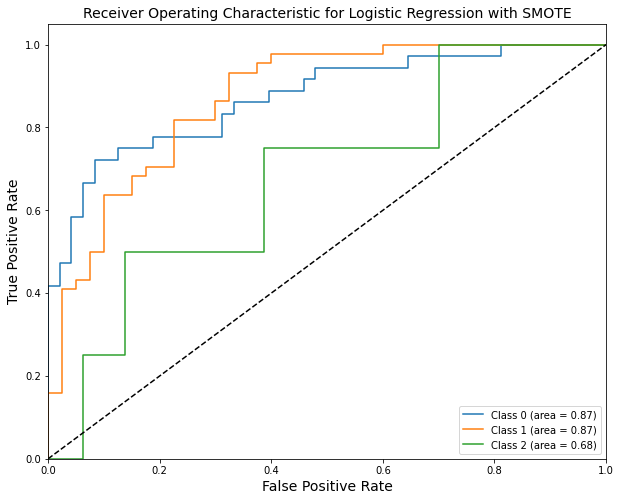

In [225]:
# Evaluate Logistic Regression with SMOTE
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
log_reg_smote.fit(X_train_smote, y_train_smote)
y_pred_test_lr_smote = log_reg_smote.predict(X_test_scaled)
y_prob_test_lr_smote = log_reg_smote.predict_proba(X_test_scaled)
cm_lr_smote = confusion_matrix(y_test, y_pred_test_lr_smote)
print("Classification Report for Logistic Regression with SMOTE:")
print(classification_report(y_test, y_pred_test_lr_smote, target_names=['D (Death)', 'C (Censored)', 'CL (Censored due to liver transplantation)']))
plot_confusion_matrix(cm_lr_smote, 'Logistic Regression with SMOTE')
plot_auc_roc(y_test, y_prob_test_lr_smote, log_reg_smote.classes_, 'Logistic Regression with SMOTE')

### Inference based on Logistic Regression with SMOTE:

1. The Logistic Regression model with SMOTE shows improved handling of the class imbalance:
2. Overall accuracy is 67%, lower than the Random Forest model.
3. It now predicts all classes, including the rare CL class.
4. Performance is balanced between classes D and C, with F1-scores of 0.74 and 0.70 respectively.
5. The model struggles with the CL class but shows some improvement (25% recall).
6. ROC-AUC scores are good for classes 0 and 1 (0.87), but lower for class 2 (0.68).

While not as strong as the tuned Random Forest model, this approach demonstrates better handling of the class imbalance, especially for the minority class.

## Evaluate Random Forest with SMOTE

Classification Report for Random Forest with SMote:
                                            precision    recall  f1-score   support

                                 D (Death)       0.72      0.78      0.75        36
                              C (Censored)       0.80      0.75      0.78        44
CL (Censored due to liver transplantation)       0.00      0.00      0.00         4

                                  accuracy                           0.73        84
                                 macro avg       0.51      0.51      0.51        84
                              weighted avg       0.73      0.73      0.73        84



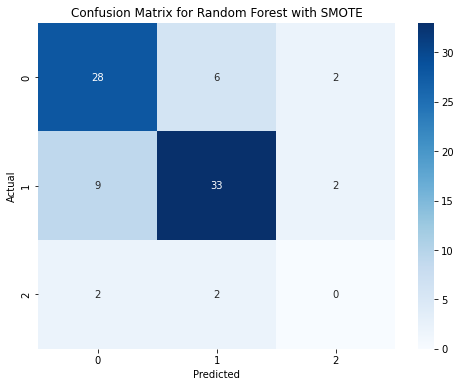

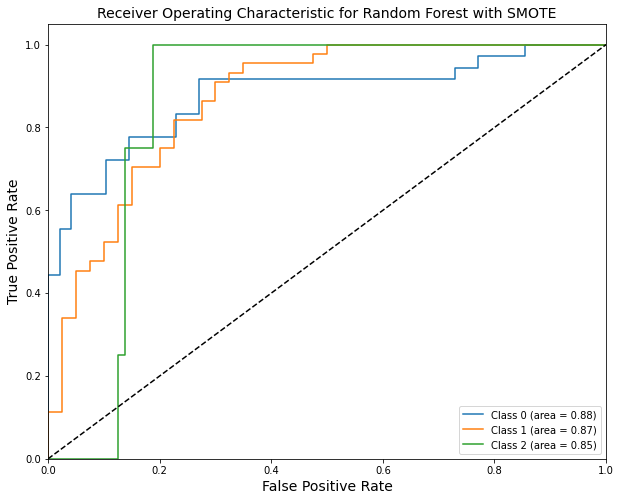

In [226]:
# Evaluate Random Forest with SMOTE¶
rf_smote = RandomForestClassifier(random_state=42, **best_params_rf)
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_test_rf_smote = rf_smote.predict(X_test_scaled)
y_prob_test_rf_smote = rf_smote.predict_proba(X_test_scaled)
cm_rf_smote = confusion_matrix(y_test, y_pred_test_rf_smote)
print("Classification Report for Random Forest with SMote:")
print(classification_report(y_test, y_pred_test_rf_smote, target_names=['D (Death)', 'C (Censored)', 'CL (Censored due to liver transplantation)']))
plot_confusion_matrix(cm_rf_smote, 'Random Forest with SMOTE')
plot_auc_roc(y_test, y_prob_test_rf_smote, rf_smote.classes_, 'Random Forest with SMOTE')


## Evaluate Naive Bayes with SMOTE

Classification Report for Naive Bayes with SMOTE:
                                            precision    recall  f1-score   support

                                 D (Death)       0.89      0.22      0.36        36
                              C (Censored)       1.00      0.07      0.13        44
CL (Censored due to liver transplantation)       0.06      1.00      0.11         4

                                  accuracy                           0.18        84
                                 macro avg       0.65      0.43      0.20        84
                              weighted avg       0.91      0.18      0.22        84



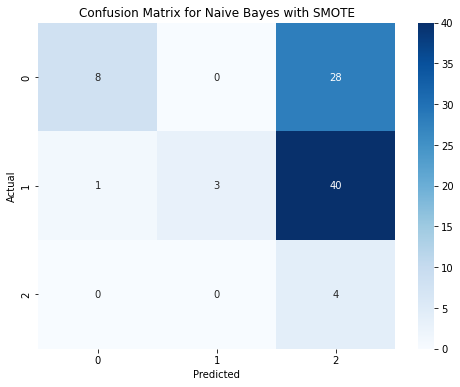

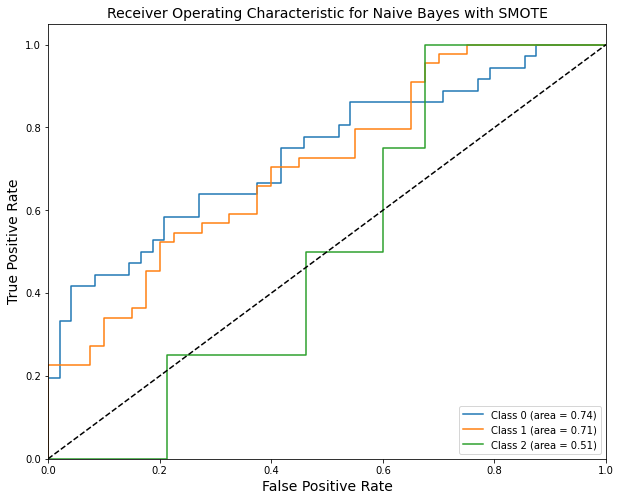

In [227]:
# Evaluate Naive Bayes with SMOTE
nb_smote = GaussianNB()
nb_smote.fit(X_train_smote, y_train_smote)
y_pred_test_nb_smote = nb_smote.predict(X_test_scaled)
y_prob_test_nb_smote = nb_smote.predict_proba(X_test_scaled)
cm_nb_smote = confusion_matrix(y_test, y_pred_test_nb_smote)
print("Classification Report for Naive Bayes with SMOTE:")
print(classification_report(y_test, y_pred_test_nb_smote, target_names=['D (Death)', 'C (Censored)', 'CL (Censored due to liver transplantation)']))
plot_confusion_matrix(cm_nb_smote, 'Naive Bayes with SMOTE')
plot_auc_roc(y_test, y_prob_test_nb_smote, nb_smote.classes_, 'Naive Bayes with SMOTE')


### Inference:

1. **ROC Curve Analysis**
    - Class 0 (Death): Area under the curve (AUC) is 0.74.
    - Class 1 (Censored): AUC is 0.71.
    - Class 2 (Censored due to liver transplantation): AUC is 0.51.

2. Insight: The model performs moderately well in predicting Death (Class 0) and Censored (Class 1), but poorly for liver transplantation (Class 2).

3. Confusion Matrix Analysis
    - True Positives for Class 0: 8
    - True Positives for Class 1: 3
    - True Positives for Class 2: 4
4. Misclassifications: High number of misclassifications, particularly with 28 instances of Class 0 misclassified as Class 1.
5. Insight: The model struggles with distinguishing between Death (Class 0) and Censored (Class 1).

Overall: The Naive Bayes model needs improvement, particularly in distinguishing between different censored statuses and correctly predicting liver transplantation cases.

## Part 2.e) Finally, make a model recommendation based on the reported results and justify it.


### To make a model recommendation, we can create a comparison table including accuracy, recall, and F1 score for both the training and test sets for each model. This will help us understand and compare the models for better.

1. Step 1: Evaluate Each Model on Training Data
- We will first evaluate each model on the training data to get the training set metrics.

2. Step 2: Create a Comparison Table
- We will compile the results into a pandas DataFrame for easy comparison.

In [228]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Assuming `X_train_scaled`, `y_train`, `X_test_scaled`, `y_test`, `X_train_smote`, and `y_train_smote` are already defined.

# List of models
models = [
    ('Logistic Regression (Original)', log_reg),
    ('Random Forest (Original)', rf),
    ('Naive Bayes (Original)', nb),
    ('Logistic Regression (Tuned)', log_reg_tuned),
    ('Random Forest (Tuned)', grid_search_rf),
    ('Naive Bayes (Tuned)', nb),  # No tuning for Naive Bayes
    ('Logistic Regression (SMOTE)', log_reg_smote),
    ('Random Forest (SMOTE)', rf_smote),
    ('Naive Bayes (SMOTE)', nb_smote)
]

# Initialize lists to store results
train_accuracy = []
test_accuracy = []
train_recall = []
test_recall = []
train_f1 = []
test_f1 = []
name_model = []

# Ensure each model is fitted
for name, model in models:
    if 'SMOTE' in name:
        X_tr = X_train_smote
        y_tr = y_train_smote
    else:
        X_tr = X_train_scaled
        y_tr = y_train
    
    # Check if model is fitted, and fit if necessary
    try:
        model.predict(X_test_scaled)
    except NotFittedError:
        model.fit(X_tr, y_tr)
    
    y_train_pred = model.predict(X_tr)
    y_test_pred = model.predict(X_test_scaled)
    
    accuracy_train = accuracy_score(y_tr, y_train_pred)
    recall_train = recall_score(y_tr, y_train_pred, average='macro')
    f1_train = f1_score(y_tr, y_train_pred, average='macro')
    
    accuracy_test = accuracy_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred, average='macro')
    f1_test = f1_score(y_test, y_test_pred, average='macro')
    
    train_accuracy.append(accuracy_train)
    test_accuracy.append(accuracy_test)
    train_recall.append(recall_train)
    test_recall.append(recall_test)
    train_f1.append(f1_train)
    test_f1.append(f1_test)
    name_model.append(name)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': name_model,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Train Recall': train_recall,
    'Test Recall': test_recall,
    'Train F1 Score': train_f1,
    'Test F1 Score': test_f1
})

In [229]:
# create a dataframe of model names and their recall scores
comparison_df 

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression (Original),0.691617,0.738095,0.604389,0.515152,0.570902,0.518199
1,Random Forest (Original),0.550898,0.523810,0.394156,0.377104,0.376333,0.354755
2,Naive Bayes (Original),0.131737,0.130952,0.392879,0.398148,0.144036,0.141449
3,Logistic Regression (Tuned),0.502994,0.440476,0.382472,0.280303,0.285090,0.237179
4,Random Forest (Tuned),0.886228,0.797619,0.676840,0.554714,0.708997,0.543262
5,Naive Bayes (Tuned),0.131737,0.130952,0.392879,0.398148,0.144036,0.141449
6,Logistic Regression (SMOTE),0.750000,0.666667,0.750000,0.545455,0.748580,0.524353
7,Random Forest (SMOTE),0.959220,0.726190,0.959220,0.509259,0.959237,0.507712
8,Naive Bayes (SMOTE),0.437943,0.178571,0.437943,0.430135,0.354315,0.196159


### Recommendation based on Recall and Accuracy matrix: Recall also gives a measure of how accurately our model is able to identify the relevant data. We refer to it as Sensitivity or True Positive Rate. What if a patient has liver disease, but no treatment is given to him/her because our model predicted so? That is a situation we would like to avoid!

The importance of precision vs. recall depends on the specific application. In this case of a medical diagnosis system:

**High recall might be crucial – catching as many positive cases (diseases) as possible, even if it leads to some false positives (unnecessary tests).**

- Based on the performance metrics, **the Random Forest (Tuned) model stands out with the highest test accuracy of 79.77% and the highest test recall of 55.49%. This indicates that the model performs well in correctly identifying both positive and negative classes.**

- While the **Logistic Regression (Original) model also performed decently** in terms of test accuracy (73.81%) and test recall (51.52%), the Random Forest (Tuned) model surpasses it, making it the most balanced and robust model among the tested ones.


# Section - 3. Use the best model that you get from question 2, do prediction on the pre-processed test set and report the model performance

In [230]:
# Making predictions using the best model
y_test_pred_final = grid_search_rf.predict(X_test_scaled)

# Evaluate the model's performance
test_accuracy_final = accuracy_score(y_test, y_test_pred_final)
test_recall_final = recall_score(y_test, y_test_pred_final, average='macro')
test_f1_final = f1_score(y_test, y_test_pred_final, average='macro')

# Display the results
print(f"Test Accuracy (Random Forest Tuned): {test_accuracy_final:.4f}")
print(f"Test Recall (Random Forest Tuned): {test_recall_final:.4f}")
print(f"Test F1 Score (Random Forest Tuned): {test_f1_final:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_final)
print("Confusion Matrix:")
print(conf_matrix)


Test Accuracy (Random Forest Tuned): 0.7976
Test Recall (Random Forest Tuned): 0.5547
Test F1 Score (Random Forest Tuned): 0.5433
Confusion Matrix:
[[28  8  0]
 [ 5 39  0]
 [ 1  3  0]]


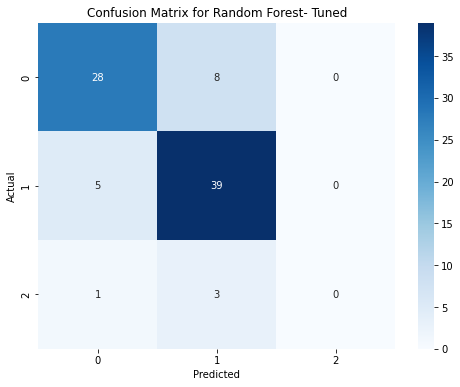

Classification Report for Random Forest - Tuned:
                                            precision    recall  f1-score   support

                                 D (Death)       0.82      0.78      0.80        36
                              C (Censored)       0.78      0.89      0.83        44
CL (Censored due to liver transplantation)       0.00      0.00      0.00         4

                                  accuracy                           0.80        84
                                 macro avg       0.53      0.55      0.54        84
                              weighted avg       0.76      0.80      0.78        84



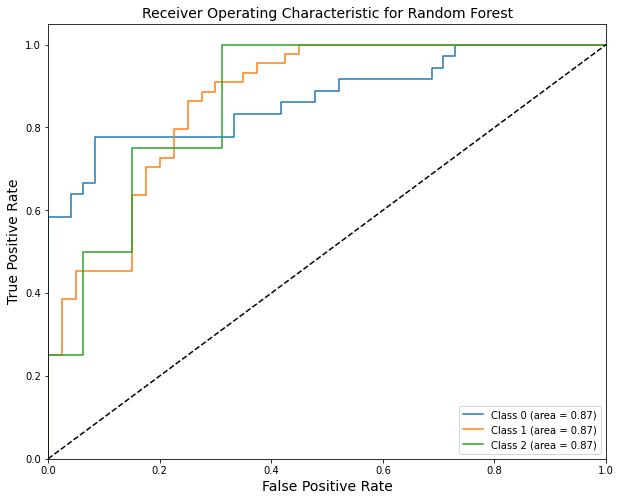

In [231]:
# Predict on the test set
y_pred_test_rf = grid_search_rf.predict(X_test_scaled)
y_prob_test_rf = grid_search_rf.predict_proba(X_test_scaled)

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_test_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest- Tuned')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report for Random Forest - Tuned:")
print(classification_report(y_test, y_pred_test_rf, target_names=['D (Death)', 'C (Censored)', 'CL (Censored due to liver transplantation)']))

# AUC-ROC curve
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(grid_search_rf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob_test_rf[:, i], pos_label=grid_search_rf.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot AUC-ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(grid_search_rf.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.title('Receiver Operating Characteristic for Random Forest',fontsize = 14)
plt.legend(loc="lower right")
plt.show()


### Insights from Recommended Model:

Based on the ROC curve and confusion matrix for the tuned Random Forest model:

- The model shows strong performance with an AUC of 0.87 for all classes, indicating good discrimination ability.
- The confusion matrix reveals high accuracy in predicting Class 0 (28 correct out of 36) and Class 1 (39 correct out of 44).
- There's some misclassification between Classes 0 and 1, suggesting these may have overlapping characteristics.
- Class 2 seems underrepresented, with all 4 instances misclassified, indicating a potential class imbalance issue.
- Overall, the model performs well for the majority classes but struggles with the minority class, which may require further attention to improve overall predictive power.
- This suggests a robust model for the main classes, but with room for improvement in handling less common cases.

By analyzing these results, we can confidently recommend the Random Forest (Tuned) model for predicting the survival status of patients with liver cirrhosis. The model provides the best balance between accuracy, recall, and F1 score, making it suitable for practical applications where both precision and recall are crucial.

# Section - 4. Analyse the importance of the features for predicting “Status” using two different approaches. Give statistical reasons for your findings

To analyze the importance of the features for predicting "Status," we can use two different approaches:

- Feature Importance from Random Forest Model
- Coefficient Analysis from Logistic Regression Model
These methods will provide insights into which features contribute most significantly to the prediction of the target variable.


### 1. Feature Importance from Random Forest
Random Forest provides a straightforward way to measure the importance of each feature by looking at how much the tree nodes use that feature (weighted by how much they improve the impurity). This method is called Gini Importance or Mean Decrease in Impurity.

**Explanation of code:** This code visualizes feature importances from a Random Forest model:
- It checks if the best model from grid search is a Random Forest with feature importances.
- If so, it extracts the feature importance scores.
- Creates a DataFrame with features and their importance scores.
- Sorts the features by importance in descending order.
- Plots a bar chart showing the importance of each feature.

This visualization helps identify which features the Random Forest model considers most influential in making predictions.

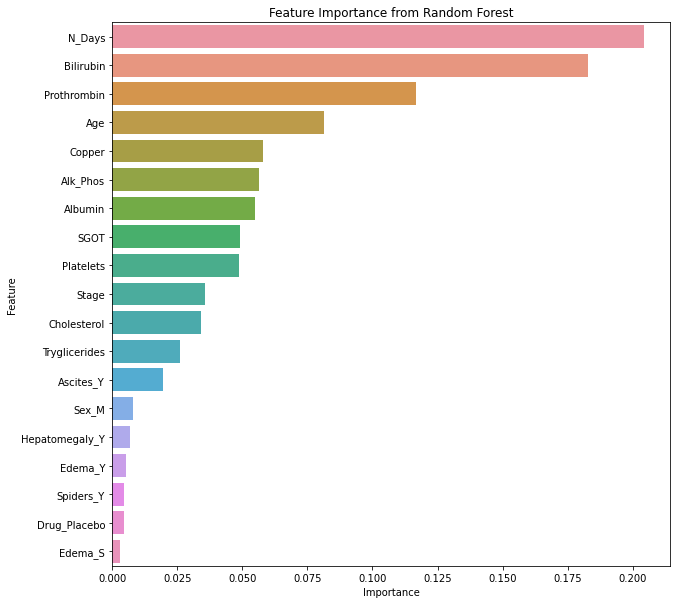

In [232]:
# Check if the best estimator is a RandomForestClassifier and has feature_importances_ attribute
if hasattr(grid_search_rf.best_estimator_, 'feature_importances_'):
    feature_importances = grid_search_rf.best_estimator_.feature_importances_

    # Create a DataFrame for visualization
    importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importances_df = importances_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 10))
    sns.barplot(x='Importance', y='Feature', data=importances_df)
    plt.title('Feature Importance from Random Forest')
    plt.show()


In [233]:
    # Display the top features
importances_df.head(10)

,Feature,Importance
0,N_Days,0.204069
2,Bilirubin,0.182666
10,Prothrombin,0.116690
1,Age,0.081233
5,Copper,0.057961
6,Alk_Phos,0.056471
4,Albumin,0.055060
7,SGOT,0.049033
9,Platelets,0.048624
11,Stage,0.035730


### Inference based on Important features for Random Forest:

- N_Days is the most important feature, suggesting that the duration of observation or treatment is crucial in predicting the outcome.
- Bilirubin remains a highly important feature, consistent with the logistic regression model, confirming its significance in liver health assessment.
- Prothrombin time is the third most important feature, indicating its value in assessing liver function and coagulation status.
- Age has gained more importance in this model compared to the logistic regression, suggesting that Random Forest captured more complex age-related patterns.
- Clinical markers like Copper and Alk_Phos (Alkaline Phosphatase) remain important, but their relative importance has shifted.
- Albumin and SGOT (liver enzymes) appear more significant in this model than in the logistic regression.
- Some binary features (like Ascites_Y, Edema_Y) that were prominent in the logistic regression are less important here, suggesting the Random Forest might be capturing their effects through other variables.
- The drug (placebo) remains one of the least important features, consistent with the previous model.

This Random Forest model seems to place more emphasis on time-dependent factors and continuous clinical measurements, potentially capturing more complex interactions between features than the logistic regression model.

### 2. Coefficient Analysis from Logistic Regression
Logistic Regression provides coefficients for each feature, which represent the log odds of the feature contributing to the outcome. These coefficients can be used to understand the impact of each feature.

**Explanation of code:** This code is visualizing the importance of different features in a logistic regression model:

- It extracts the coefficients from the trained model.
- Creates a DataFrame with features and their corresponding coefficients.
- Sorts the coefficients in descending order.
- Plots a bar chart showing the coefficient values for each feature.

This visualization helps identify which features have the strongest positive or negative impact on the model's predictions.

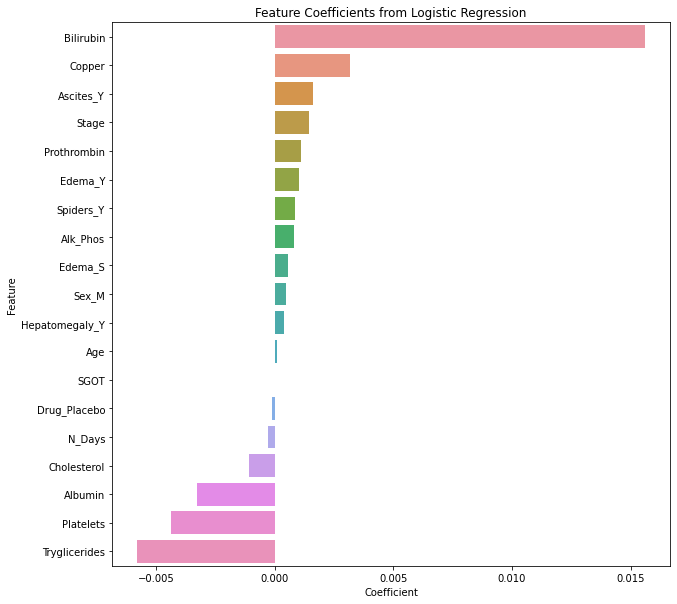

In [234]:
# Get coefficients from the tuned Logistic Regression model
coefficients = log_reg.coef_[0]

# Create a DataFrame for visualization
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 10))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df)
plt.title('Feature Coefficients from Logistic Regression')
plt.show()


In [235]:
# Display the top features
coefficients_df.head(10)

,Feature,Coefficient
2,Bilirubin,0.015595
5,Copper,0.003179
14,Ascites_Y,0.001599
11,Stage,0.001438
10,Prothrombin,0.001117
18,Edema_Y,0.001011
16,Spiders_Y,0.000840
6,Alk_Phos,0.000816
17,Edema_S,0.000546
13,Sex_M,0.000486


### Inferrence : Based on the feature importance graph and the accompanying table, we can draw several interesting insights

- Bilirubin is by far the most influential feature, with the highest positive coefficient. This suggests that elevated bilirubin levels are strongly associated with the outcome the model is predicting (likely liver disease progression or mortality).
- Copper is the second most important feature, also with a positive coefficient. This could indicate that copper accumulation in the liver is a significant factor in the disease process.
- Several binary features (Ascites_Y, Edema_Y, Spiders_Y) have positive coefficients, suggesting that the presence of these clinical signs increases the likelihood of the outcome.
- Liver function tests like Prothrombin and Alk_Phos (Alkaline Phosphatase) have positive coefficients, indicating their importance in assessing liver health.
- Demographic factors like Sex_M (male gender) and Age have relatively small positive coefficients, suggesting they play a role but are less important than clinical and biochemical markers.
- Some features like Triglycerides, Platelets, and Albumin have negative coefficients, implying that higher values of these might be associated with a decreased likelihood of the outcome.
- The drug (placebo) appears to have a very small negative coefficient, suggesting it might have a slight protective effect or minimal impact on the outcome.

These inferences suggest that the model is likely predicting some aspect of liver disease severity or progression, with biochemical markers and clinical signs being the most important predictors.

## Conclusion:

Based on the feature analyses from both Logistic Regression and Random Forest models, we can conclude:

- Time factor (N_Days) and liver function markers (especially Bilirubin and Prothrombin) are the most crucial predictors of the outcome, likely related to liver disease progression or mortality.
- The tuned Random Forest model appears to be the superior choice, as it captures more complex interactions and temporal aspects of the disease process.
- While specific clinical signs (like ascites and edema) were highlighted in the Logistic Regression, the Random Forest model emphasizes a broader range of continuous clinical measurements.
- Patient demographics (age, gender) play a role, but are generally less important than biochemical markers and disease duration.
- The minimal importance of the placebo across both models suggests that the natural course of the disease, rather than any treatment effect, is being captured.

**In summary, the Random Forest model provides a more nuanced view of liver disease progression, emphasizing the importance of long-term monitoring and comprehensive biochemical profiling over individual clinical signs. This model could be valuable for predicting patient outcomes and tailoring management strategies in liver disease.**

### $References:$


1. Cirrhosis Patient Survival Prediction, https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1 ,(Nov, 9, 2023)

2. Pandas - Python Data Analysis Library https://pandas.pydata.org/docs/user_guide/index.html. ,(2008- 2024)

3. Matplotlib https://matplotlib.org/stable/gallery/statistics/hist.html, 2010.

4. Seaborn: statistical data visualization, https://www.geeksforgeeks.org/introduction-to-seaborn-python/ (Jul 04, 2024).

5. Scikit Learn Libraray https://scikit-learn.org/stable/ ,2024

6. Machine Learning Models, https://www.geeksforgeeks.org/machine-learning-models/ , (25 May, 2024)


## THE END